In [1]:
import dataCleaning
import accuracyHistory

import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn 

from tqdm import tqdm

2023-05-18 11:45:51.176777: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 11:45:51.424150: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-18 11:45:51.424192: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-18 11:45:52.448096: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
data_imgs = np.load('../Kanji-recognizer/data/kkanj-imgs.npz')
data_labels = np.load('../Kanji-recognizer/data/kkanji-labels.npz')

imgs = data_imgs['arr_0']
labels = data_labels['arr_0']

def kanji(kaniUnicode):
    return chr(int(kaniUnicode[2:], 16))

filtered_labels, filtered_images = dataCleaning.remove_min_occurences(labels, imgs)

#X = filtered_images[14000:44000]
#Z = filtered_labels[14000:44000]

X = filtered_images[:14000]
Z = filtered_labels[:14000]


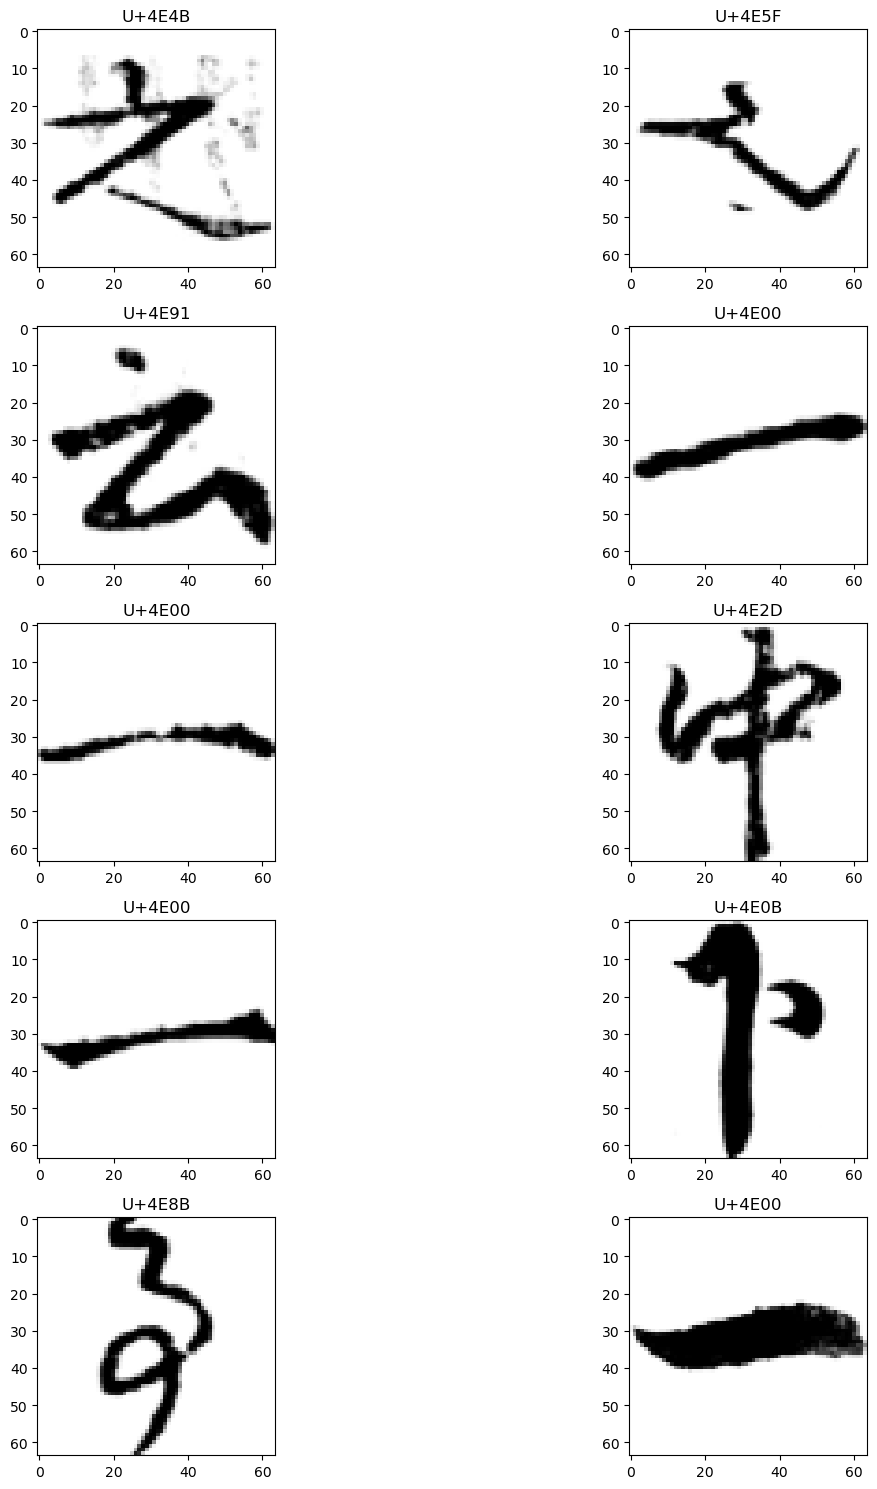

In [3]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l], cmap='Greys')
        ax[i,j].set_title(Z[l])
        
        
plt.tight_layout()

In [4]:
len(np.unique(Z))

19

In [5]:
le=LabelEncoder()


Y=le.fit_transform(Z)


Y=to_categorical(Y,len(np.unique(Z)))


X=np.array(X)


X=X/255


In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=42)
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [7]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size= (3,3), padding= 'Same', activation='relu', input_shape = (64,64, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size= (3,3), padding= 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size= (1,1), padding= 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size= (1,1), padding= 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(len(np.unique(Z)), activation="softmax"))

2023-05-18 11:46:00.652974: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-18 11:46:00.653054: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-18 11:46:00.653077: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (108bb72cdfce): /proc/driver/nvidia/version does not exist
2023-05-18 11:46:00.653371: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
batch_size=200
epochs=3

from keras.callbacks import ReduceLROnPlateau
red_lr = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1,factor=0.1)

In [9]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=False,
    vertical_flip=False
)

#datagen.fit(x_train.reshape(10500, 64, 64, 1))

In [10]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 96)        6240      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 96)         0

In [12]:
History = model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), verbose=1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/3
52/52 [==============================] - 23s 439ms/step - loss: 1.0826 - accuracy: 0.7136 - val_loss: 0.4250 - val_accuracy: 0.8769
Epoch 2/3
52/52 [==============================] - 22s 434ms/step - loss: 0.2616 - accuracy: 0.9239 - val_loss: 0.2041 - val_accuracy: 0.9443
Epoch 3/3
52/52 [==============================] - 22s 429ms/step - loss: 0.1307 - accuracy: 0.9626 - val_loss: 0.1522 - val_accuracy: 0.9594


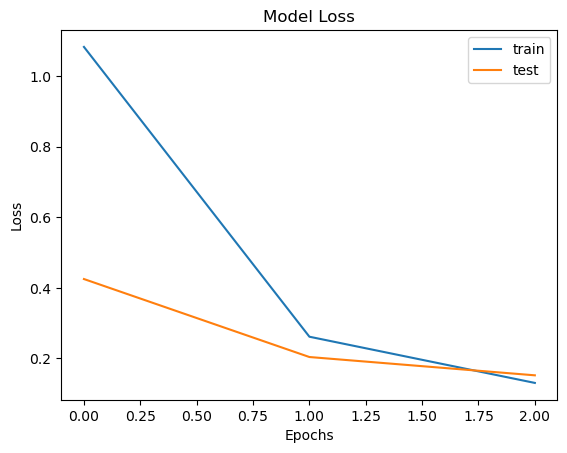

In [13]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [14]:
accuracy_history = []
accuracy_history_img = []

1/1 [==============================] - 0s 127ms/step
Predicted class: 10
Predicted class probability: 96.35957479476929 %
[[1.7983862e-07 6.4473031e-03 2.1549940e-06 8.3118374e-04 1.6531709e-04
  4.3593850e-08 8.3720834e-06 1.9368032e-07 6.3701592e-08 3.7678168e-05
  9.6359575e-01 2.1107448e-03 2.3646200e-02 9.4597553e-06 1.0983241e-04
  5.7631161e-04 1.9881281e-03 4.1495955e-06 4.6681685e-04]]


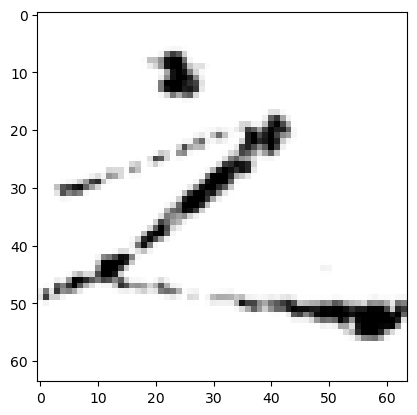

In [15]:
from matplotlib import pyplot


results = model.evaluate(x_test, y_test)
image_number = 2172
new_image = tf.expand_dims(x_test[image_number], 0)
predictions = model.predict(new_image)
predicted_class_index = predictions.argmax(axis=-1)[0]
predicted_class_probability = predictions[0][predicted_class_index]
print('Predicted class:', predicted_class_index)
print('Predicted class probability:', predicted_class_probability*100, "%")
print(predictions)
accuracy_history.append(predicted_class_probability*100)
accuracy_history_img.append(image_number)

pyplot.imshow(x_test[image_number], cmap='Greys')
#print(kanji(y_test[image_number]))


In [16]:
import webscraping

class_prediction = 10
print("Code: ", np.unique(Z)[class_prediction])
print(kanji(np.unique(Z)[class_prediction]))
webscraping.get_meaning(kanji(np.unique(Z)[class_prediction]))

Code:  U+4E4B
之

of, 
this



In [17]:
import matplotlib.pyplot as plt
accuracy_history = tuple()

def save_and_display_accuracyJup(kanji, new_accuracy):

    global accuracy_history
    accuracy_history += (kanji, new_accuracy)
    accuracies = accuracy_history[1::2]  

    print(accuracy_history)
    plt.plot(accuracies)
    plt.title('Skill Rating')
    plt.ylabel('Accuracy (%)')
    plt.xlabel('Kanjis')
    plt.show()

1/1 [==============================] - 0s 45ms/step
Predicted class: 13
Predicted class probability: 99.46154952049255 %
U+4E8B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

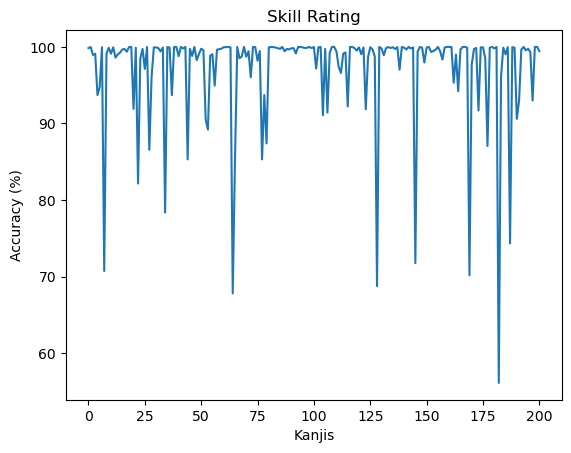

1/1 [==============================] - 0s 36ms/step
Predicted class: 18
Predicted class probability: 97.28034734725952 %
U+4EBA
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

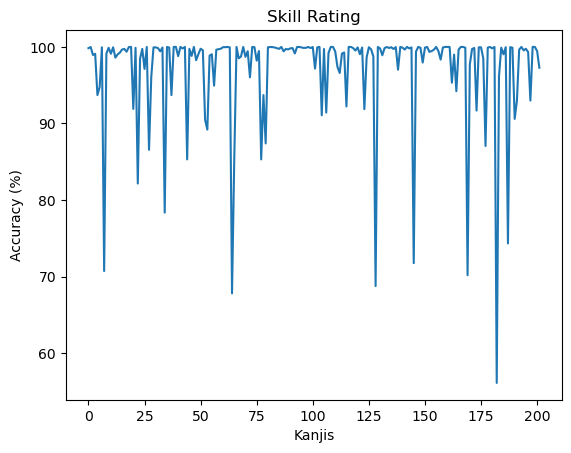

1/1 [==============================] - 0s 50ms/step
Predicted class: 4
Predicted class probability: 91.04914665222168 %
U+4E0A
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

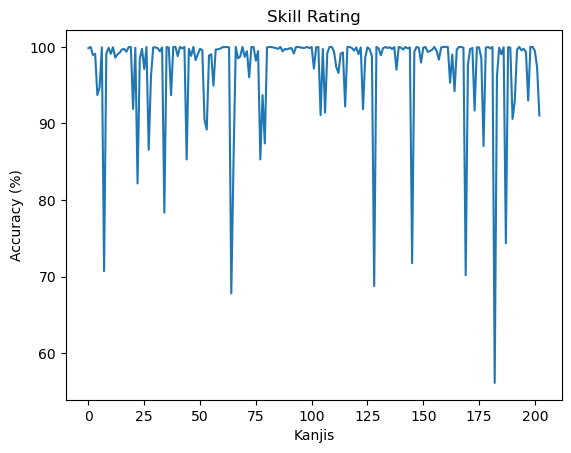

1/1 [==============================] - 0s 36ms/step
Predicted class: 15
Predicted class probability: 99.78717565536499 %
U+4E91
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

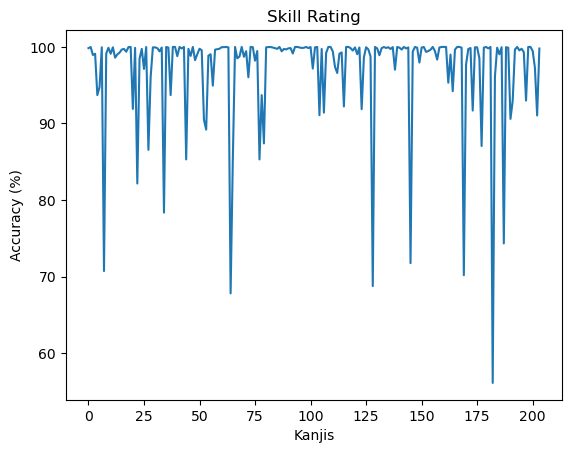

1/1 [==============================] - 0s 36ms/step
Predicted class: 15
Predicted class probability: 99.99464750289917 %
U+4E91
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

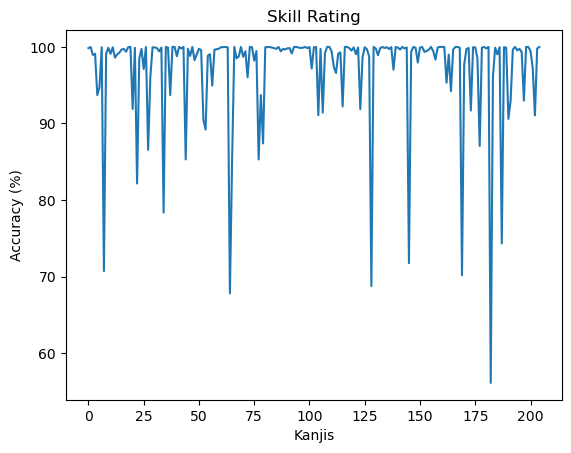

1/1 [==============================] - 0s 46ms/step
Predicted class: 8
Predicted class probability: 98.16925525665283 %
U+4E2D
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

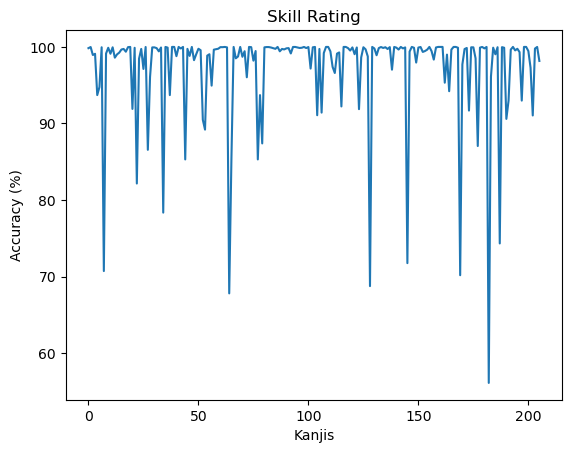

1/1 [==============================] - 0s 41ms/step
Predicted class: 10
Predicted class probability: 96.35957479476929 %
U+4E4B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

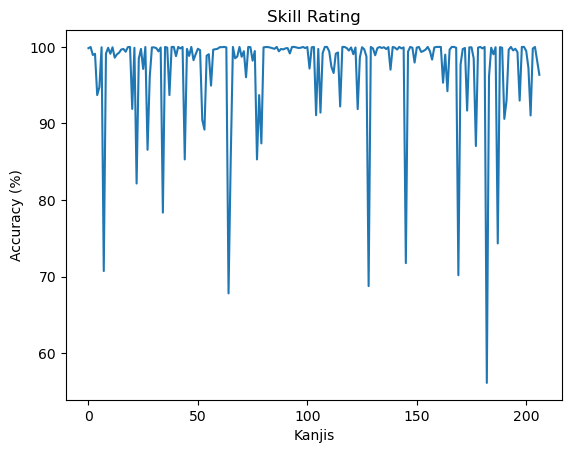

1/1 [==============================] - 0s 34ms/step
Predicted class: 13
Predicted class probability: 99.21873807907104 %
U+4E8B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

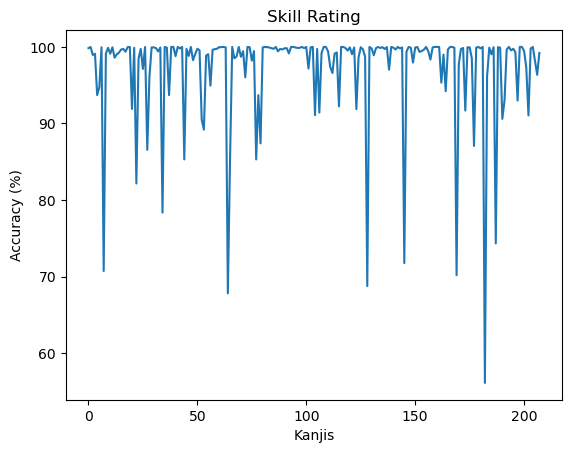

1/1 [==============================] - 0s 36ms/step
Predicted class: 12
Predicted class probability: 99.9440610408783 %
U+4E5F
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

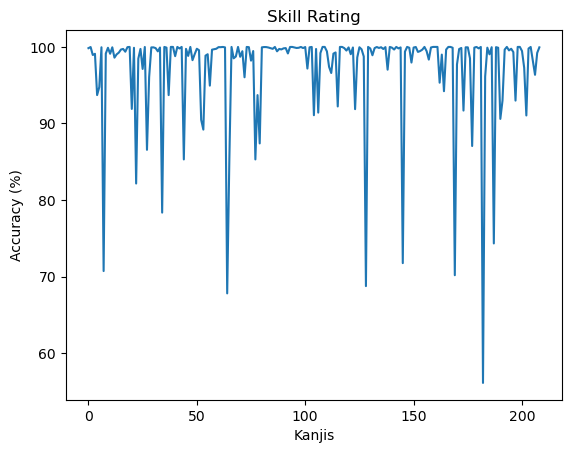

1/1 [==============================] - 0s 34ms/step
Predicted class: 0
Predicted class probability: 99.93160963058472 %
U+4E00
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

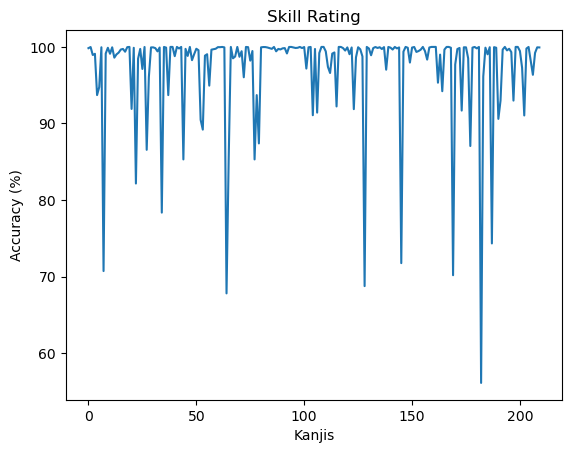

1/1 [==============================] - 0s 33ms/step
Predicted class: 0
Predicted class probability: 99.89535808563232 %
U+4E00
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

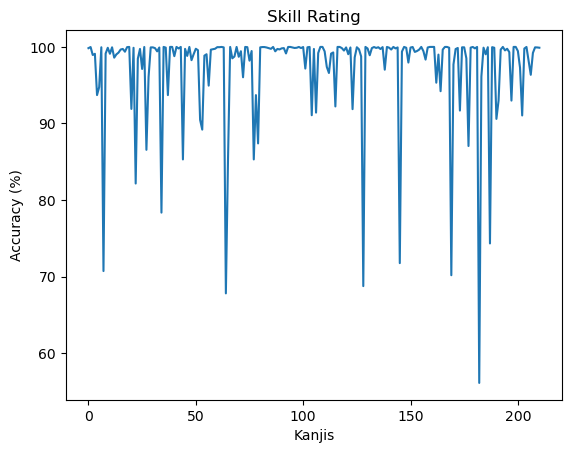

1/1 [==============================] - 0s 32ms/step
Predicted class: 0
Predicted class probability: 99.90367889404297 %
U+4E00
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

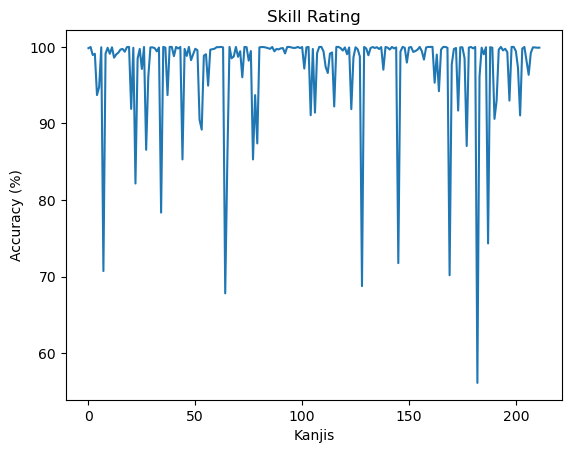

1/1 [==============================] - 0s 30ms/step
Predicted class: 6
Predicted class probability: 98.77134561538696 %
U+4E0D
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

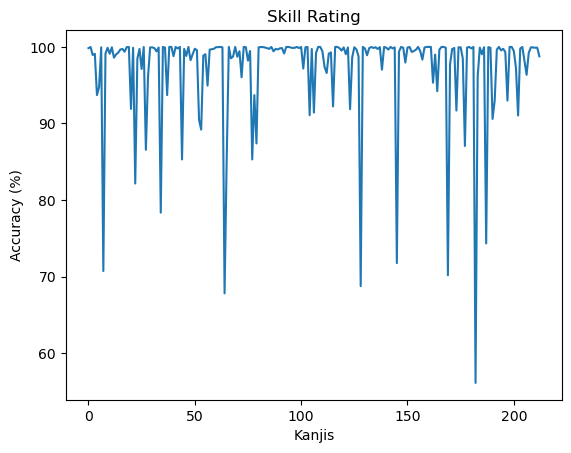

1/1 [==============================] - 0s 28ms/step
Predicted class: 0
Predicted class probability: 97.09669947624207 %
U+4E00
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

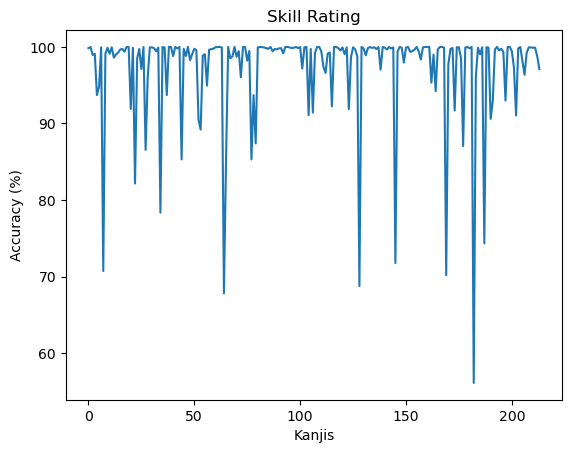

1/1 [==============================] - 0s 27ms/step
Predicted class: 18
Predicted class probability: 99.99257326126099 %
U+4EBA
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

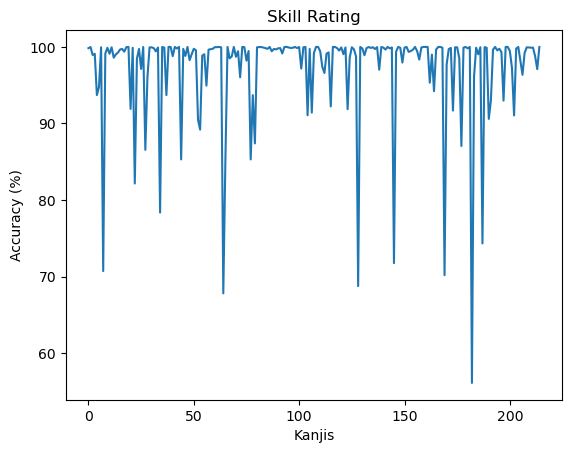

1/1 [==============================] - 0s 27ms/step
Predicted class: 8
Predicted class probability: 99.94390606880188 %
U+4E2D
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

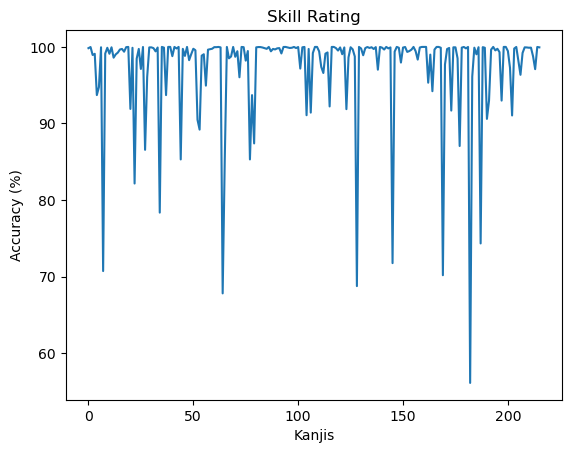

1/1 [==============================] - 0s 28ms/step
Predicted class: 2
Predicted class probability: 86.16817593574524 %
U+4E07
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

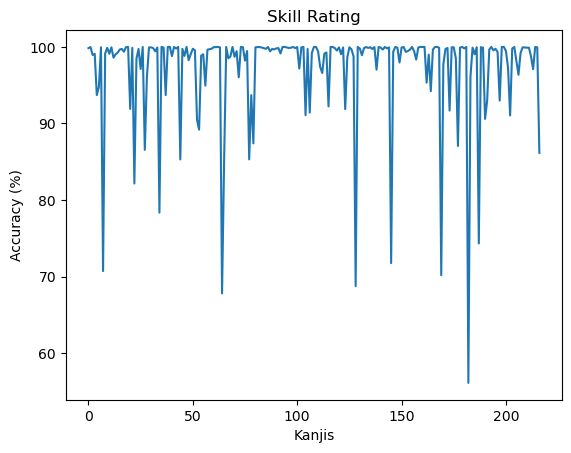

1/1 [==============================] - 0s 23ms/step
Predicted class: 0
Predicted class probability: 99.56821203231812 %
U+4E00
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

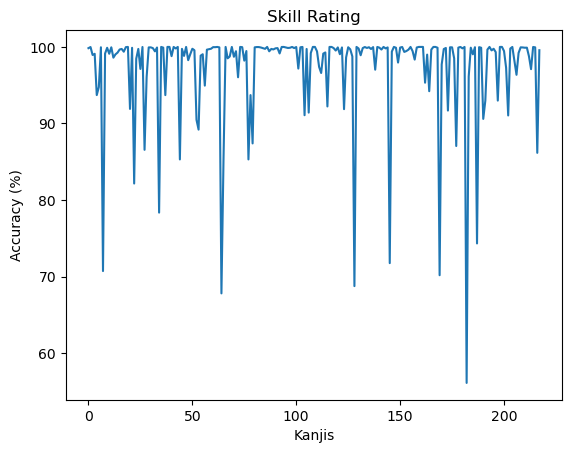

1/1 [==============================] - 0s 45ms/step
Predicted class: 17
Predicted class probability: 98.65299463272095 %
U+4EAC
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

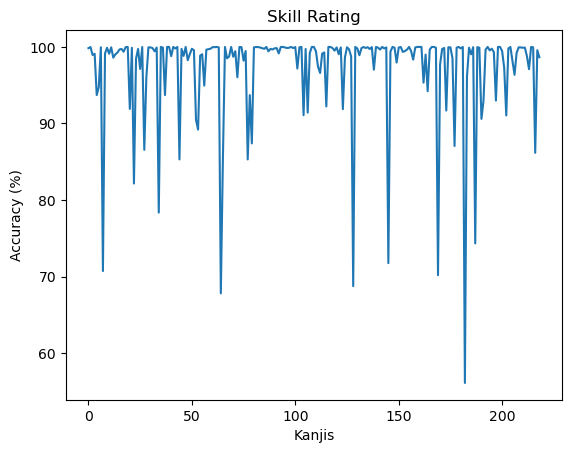

1/1 [==============================] - 0s 23ms/step
Predicted class: 5
Predicted class probability: 90.75341820716858 %
U+4E0B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

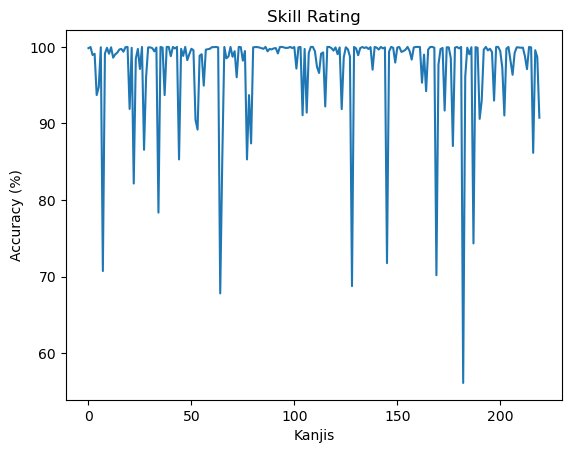

1/1 [==============================] - 0s 23ms/step
Predicted class: 10
Predicted class probability: 99.93114471435547 %
U+4E4B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

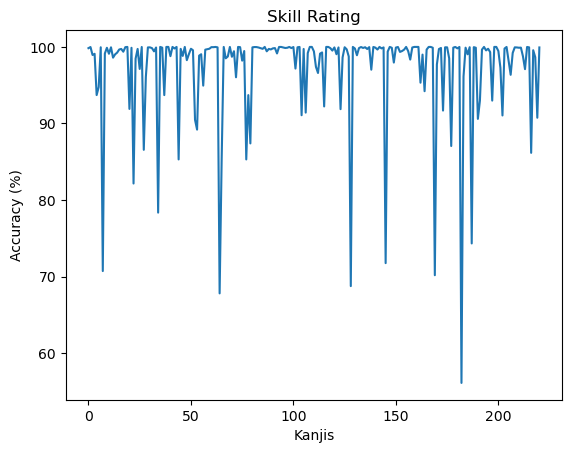

1/1 [==============================] - 0s 31ms/step
Predicted class: 0
Predicted class probability: 99.69536066055298 %
U+4E00
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

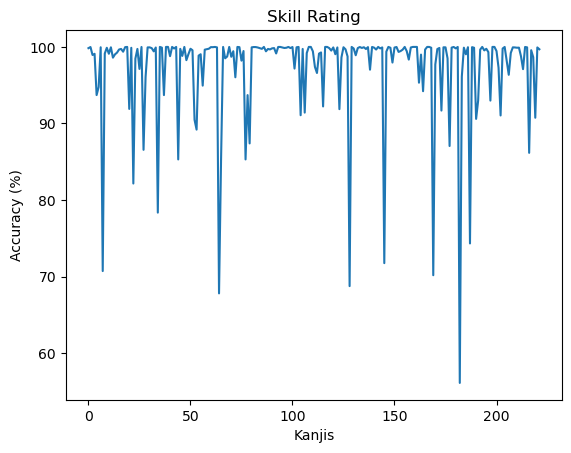

1/1 [==============================] - 0s 27ms/step
Predicted class: 13
Predicted class probability: 99.95582699775696 %
U+4E8B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

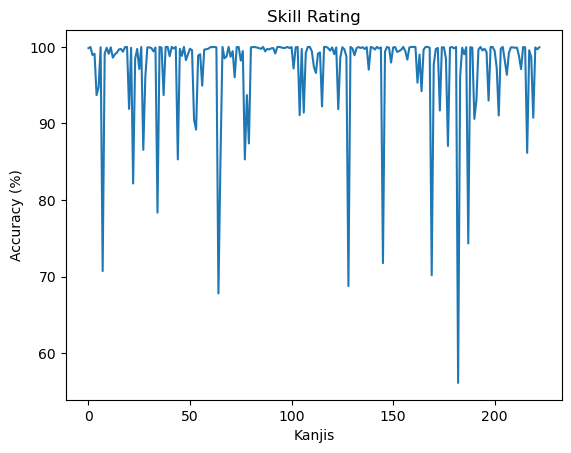

1/1 [==============================] - 0s 25ms/step
Predicted class: 18
Predicted class probability: 99.9998927116394 %
U+4EBA
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

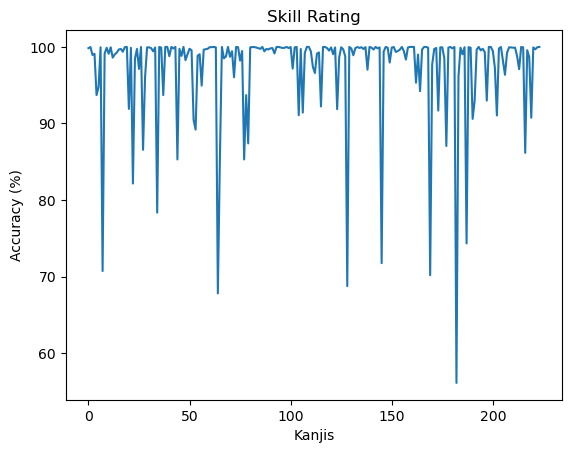

1/1 [==============================] - 0s 25ms/step
Predicted class: 3
Predicted class probability: 99.91214871406555 %
U+4E09
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

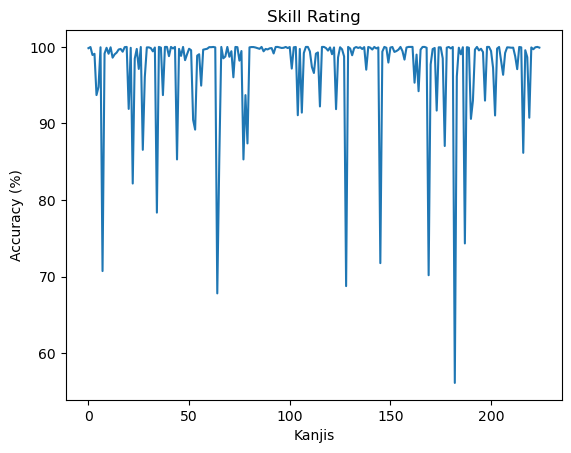

1/1 [==============================] - 0s 26ms/step
Predicted class: 15
Predicted class probability: 99.85052347183228 %
U+4E91
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

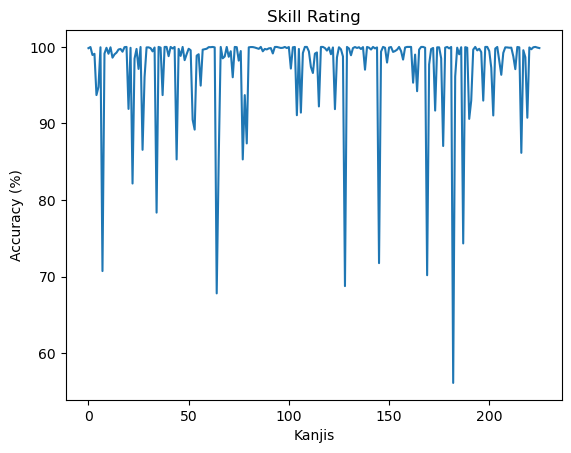

1/1 [==============================] - 0s 25ms/step
Predicted class: 15
Predicted class probability: 99.79550838470459 %
U+4E91
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

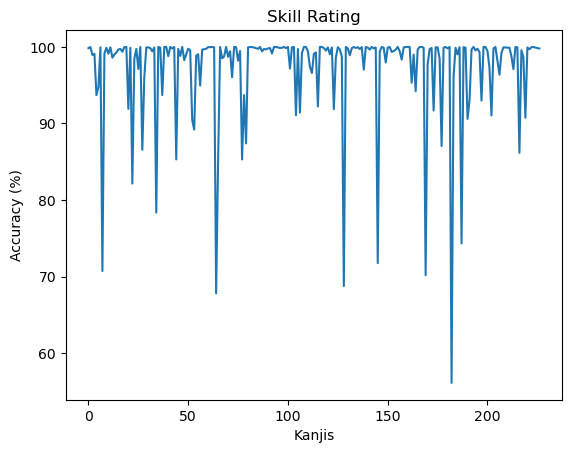

1/1 [==============================] - 0s 26ms/step
Predicted class: 8
Predicted class probability: 99.23065304756165 %
U+4E2D
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

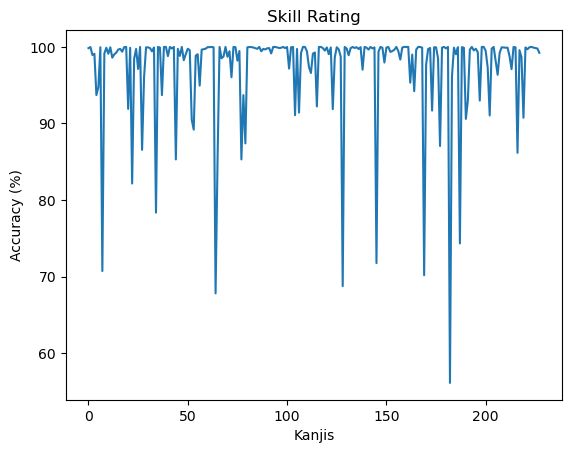

1/1 [==============================] - 0s 23ms/step
Predicted class: 15
Predicted class probability: 86.11037135124207 %
U+4E91
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

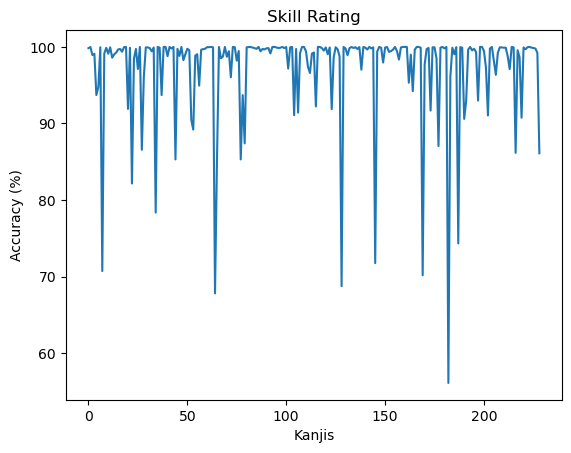

1/1 [==============================] - 0s 23ms/step
Predicted class: 13
Predicted class probability: 99.0378737449646 %
U+4E8B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

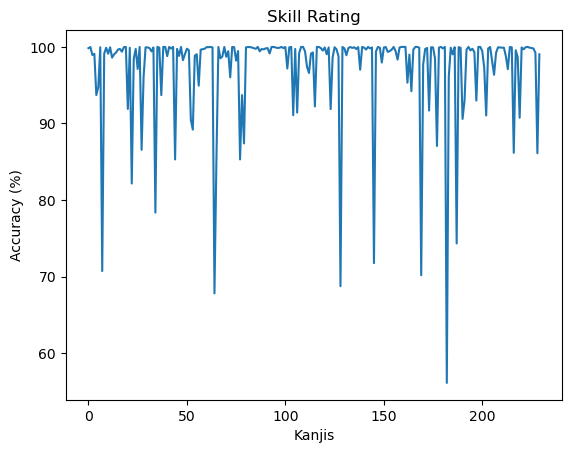

1/1 [==============================] - 0s 24ms/step
Predicted class: 10
Predicted class probability: 99.89917874336243 %
U+4E4B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

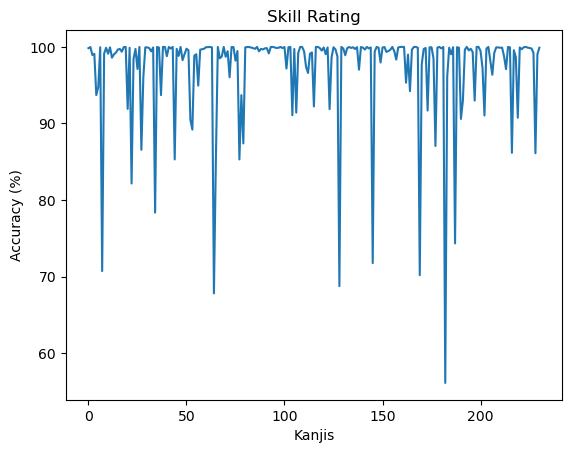

1/1 [==============================] - 0s 25ms/step
Predicted class: 0
Predicted class probability: 99.68974590301514 %
U+4E00
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

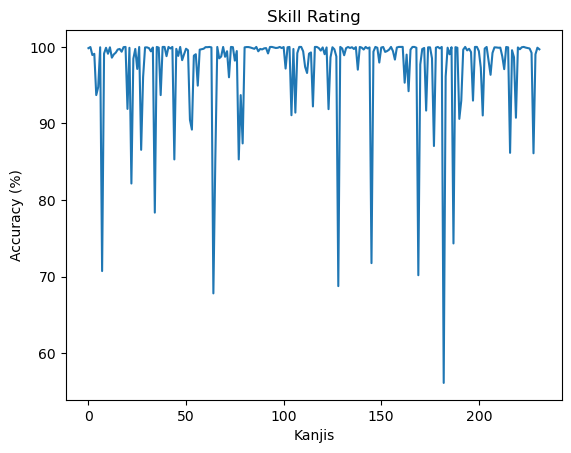

1/1 [==============================] - 0s 23ms/step
Predicted class: 18
Predicted class probability: 99.99532699584961 %
U+4EBA
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

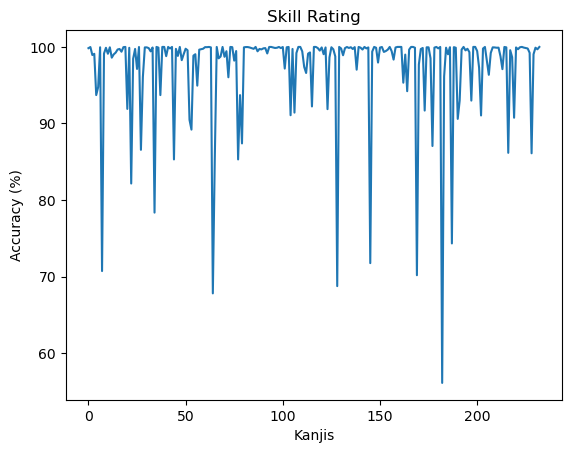

1/1 [==============================] - 0s 24ms/step
Predicted class: 12
Predicted class probability: 99.61075186729431 %
U+4E5F
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

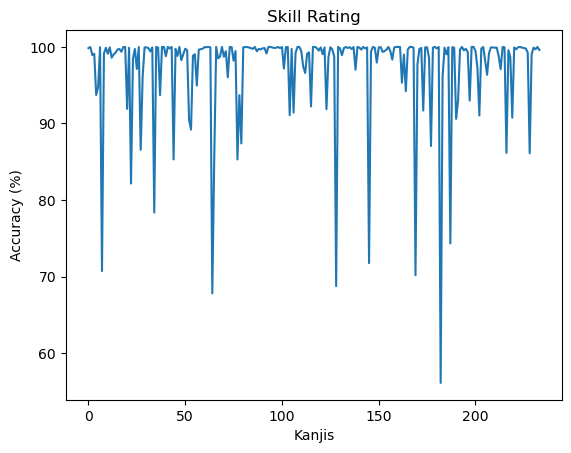

1/1 [==============================] - 0s 26ms/step
Predicted class: 13
Predicted class probability: 69.48207020759583 %
U+4E8B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

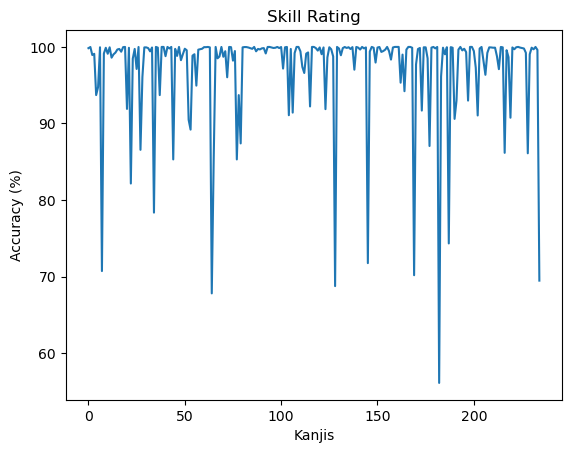

1/1 [==============================] - 0s 23ms/step
Predicted class: 0
Predicted class probability: 99.96941089630127 %
U+4E00
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

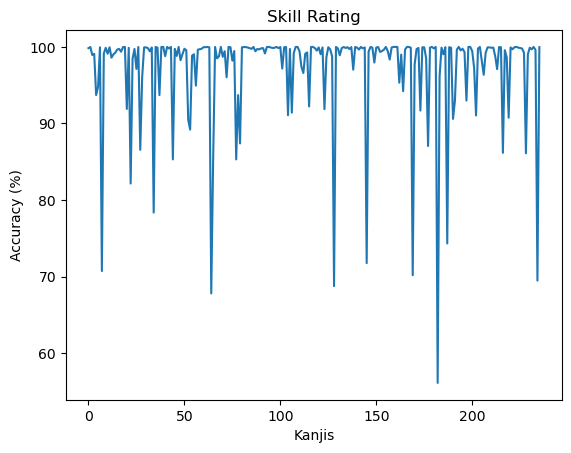

1/1 [==============================] - 0s 26ms/step
Predicted class: 17
Predicted class probability: 97.33448624610901 %
U+4EAC
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

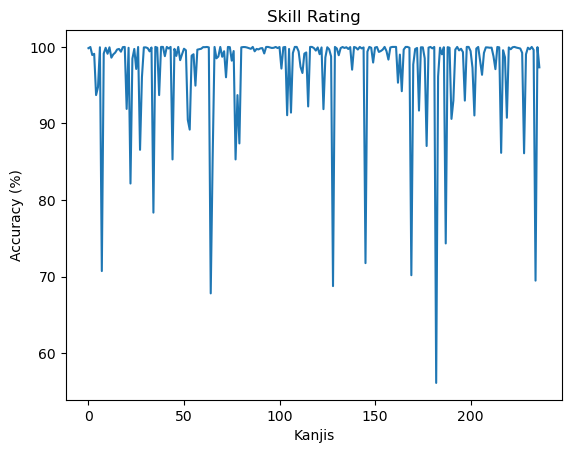

1/1 [==============================] - 0s 23ms/step
Predicted class: 3
Predicted class probability: 96.79790139198303 %
U+4E09
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

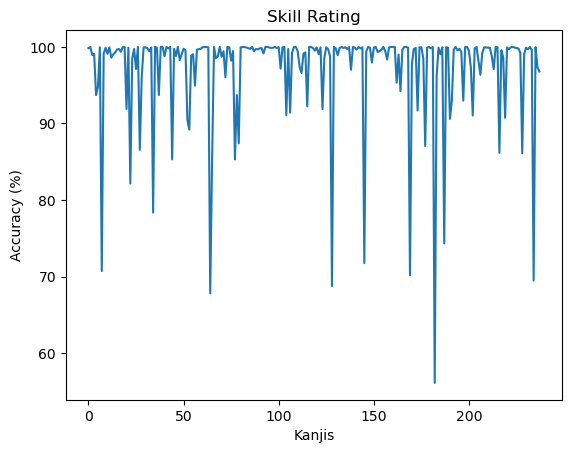

1/1 [==============================] - 0s 24ms/step
Predicted class: 12
Predicted class probability: 96.24792337417603 %
U+4E5F
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

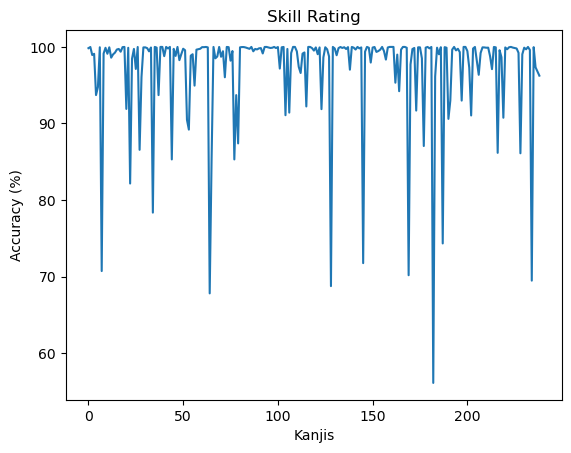

1/1 [==============================] - 0s 23ms/step
Predicted class: 13
Predicted class probability: 99.98201727867126 %
U+4E8B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

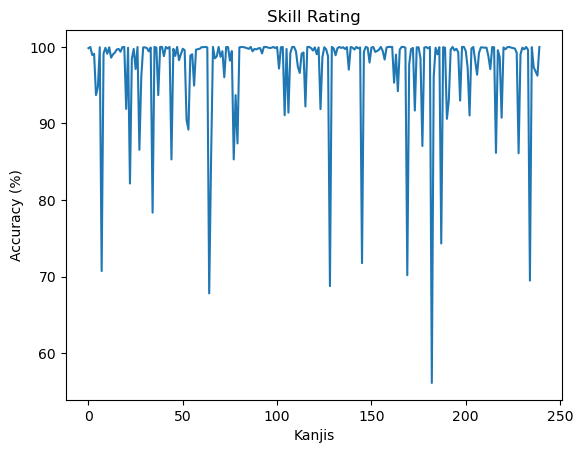

1/1 [==============================] - 0s 23ms/step
Predicted class: 4
Predicted class probability: 99.71036314964294 %
U+4E0A
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

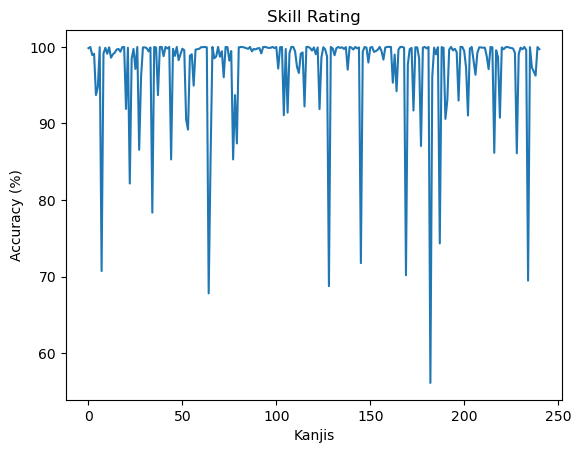

1/1 [==============================] - 0s 24ms/step
Predicted class: 3
Predicted class probability: 98.910391330719 %
U+4E09
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F', 

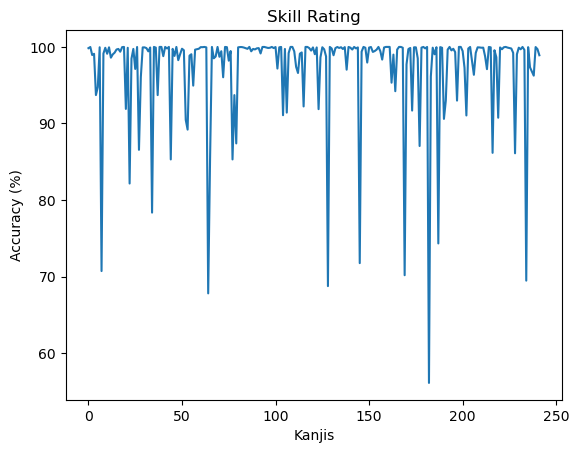

1/1 [==============================] - 0s 22ms/step
Predicted class: 14
Predicted class probability: 99.85436201095581 %
U+4E8C
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

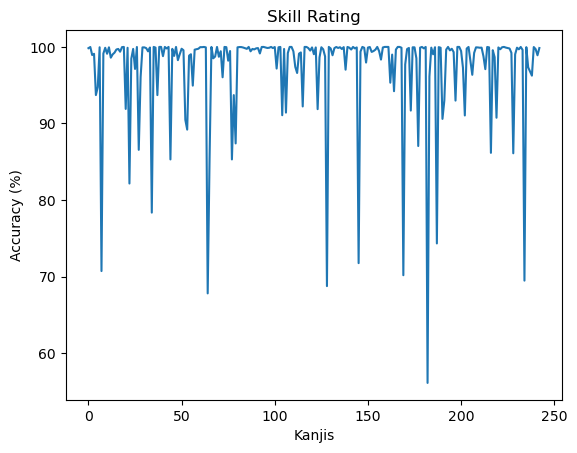

1/1 [==============================] - 0s 24ms/step
Predicted class: 13
Predicted class probability: 97.64575362205505 %
U+4E8B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

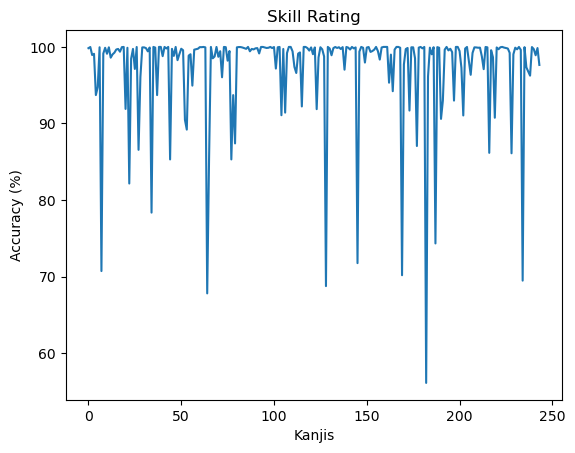

1/1 [==============================] - 0s 40ms/step
Predicted class: 0
Predicted class probability: 99.44721460342407 %
U+4E00
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

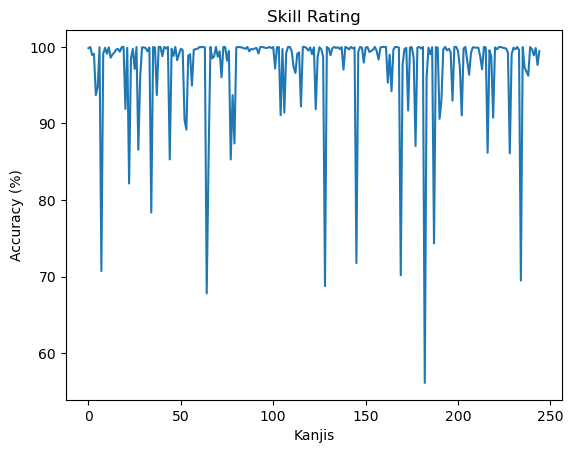

1/1 [==============================] - 0s 21ms/step
Predicted class: 0
Predicted class probability: 97.84700870513916 %
U+4E00
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

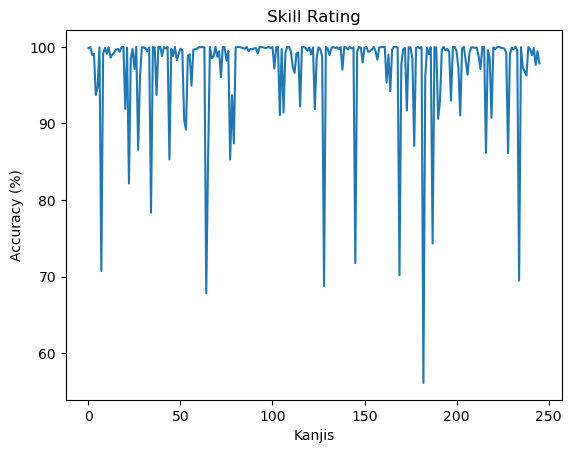

1/1 [==============================] - 0s 34ms/step
Predicted class: 3
Predicted class probability: 99.82215762138367 %
U+4E09
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

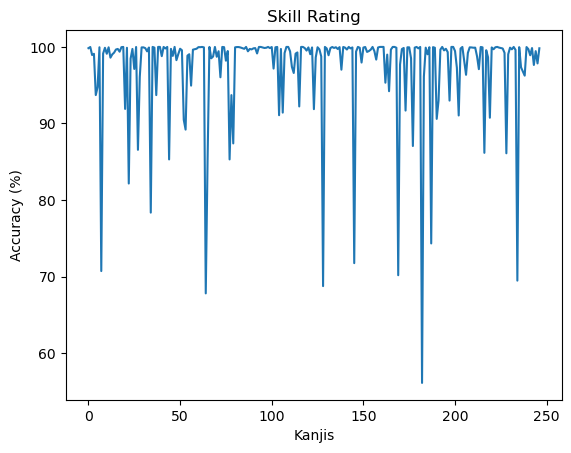

1/1 [==============================] - 0s 24ms/step
Predicted class: 13
Predicted class probability: 99.981290102005 %
U+4E8B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F',

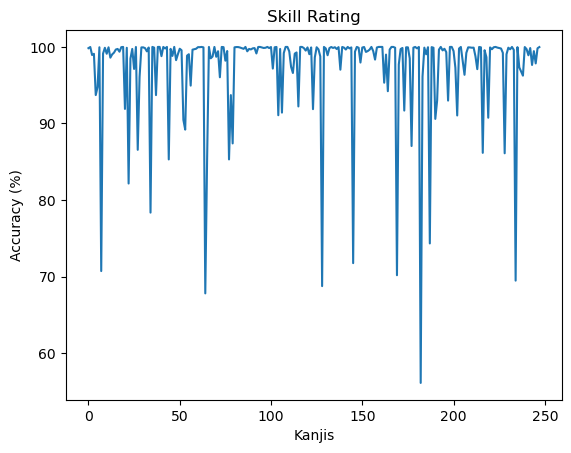

1/1 [==============================] - 0s 24ms/step
Predicted class: 12
Predicted class probability: 91.0466730594635 %
U+4E5F
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

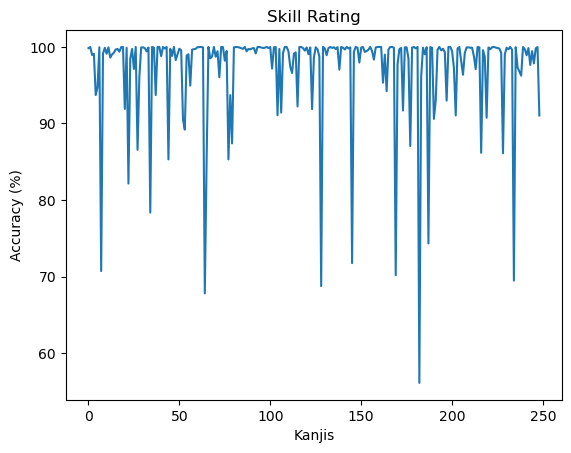

1/1 [==============================] - 0s 27ms/step
Predicted class: 18
Predicted class probability: 99.9998688697815 %
U+4EBA
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

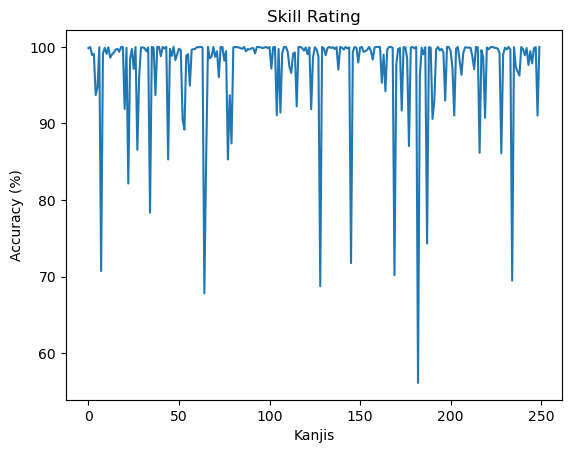

1/1 [==============================] - 0s 56ms/step
Predicted class: 14
Predicted class probability: 99.88644123077393 %
U+4E8C
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

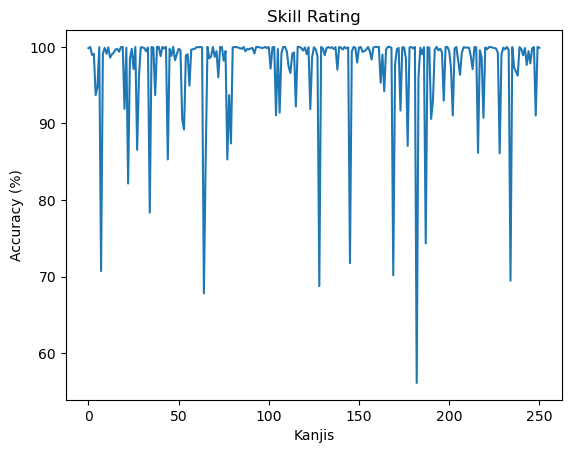

1/1 [==============================] - 0s 31ms/step
Predicted class: 8
Predicted class probability: 98.48798513412476 %
U+4E2D
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

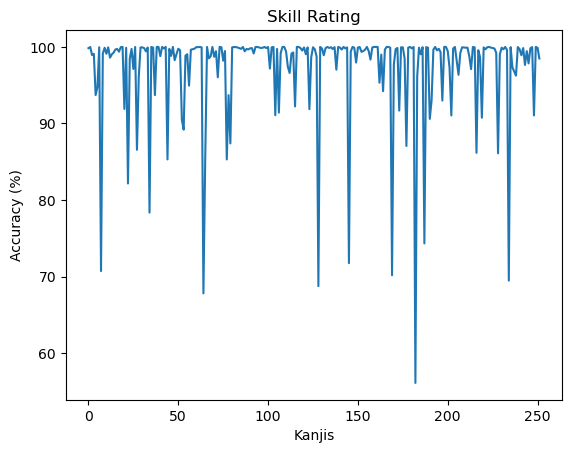

1/1 [==============================] - 0s 35ms/step
Predicted class: 15
Predicted class probability: 99.9067485332489 %
U+4E91
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

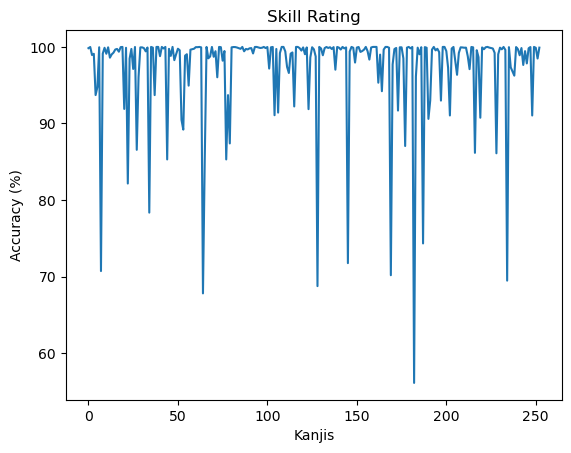

1/1 [==============================] - 0s 31ms/step
Predicted class: 7
Predicted class probability: 99.96697902679443 %
U+4E16
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

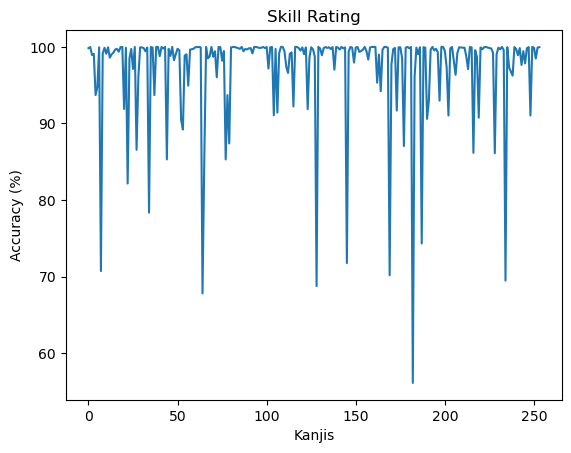

1/1 [==============================] - 0s 31ms/step
Predicted class: 3
Predicted class probability: 99.9171495437622 %
U+4E09
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F',

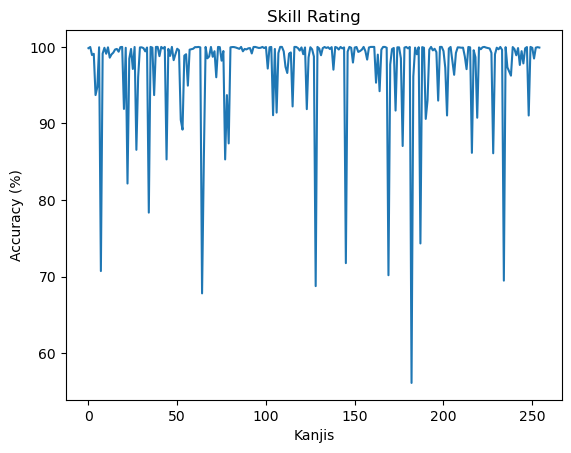

1/1 [==============================] - 0s 41ms/step
Predicted class: 8
Predicted class probability: 99.59350824356079 %
U+4E2D
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

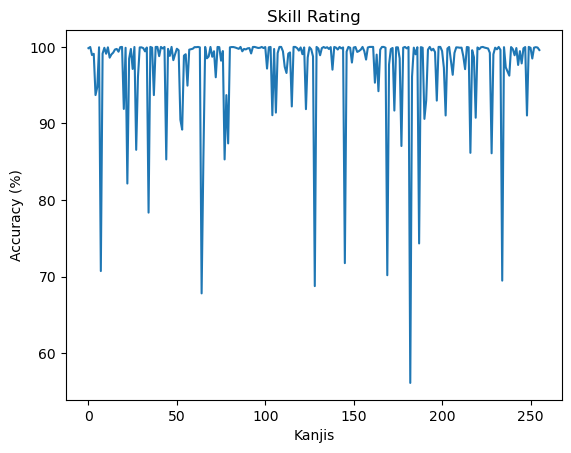

1/1 [==============================] - 0s 40ms/step
Predicted class: 7
Predicted class probability: 99.61863160133362 %
U+4E16
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

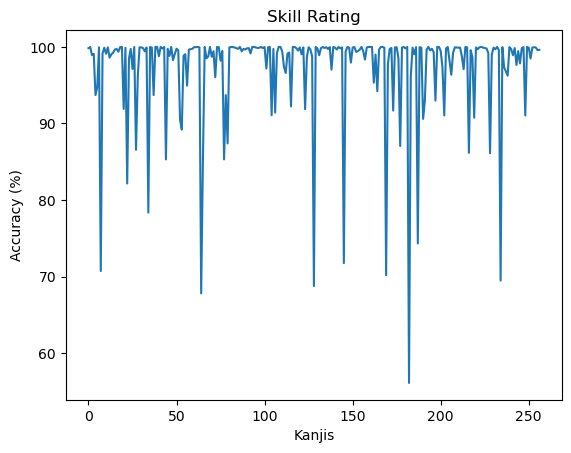

1/1 [==============================] - 0s 48ms/step
Predicted class: 0
Predicted class probability: 99.44289922714233 %
U+4E00
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

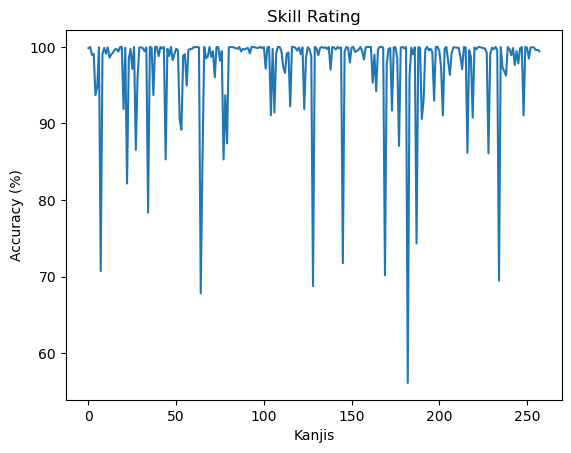

1/1 [==============================] - 0s 33ms/step
Predicted class: 16
Predicted class probability: 95.24363875389099 %
U+4E94
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

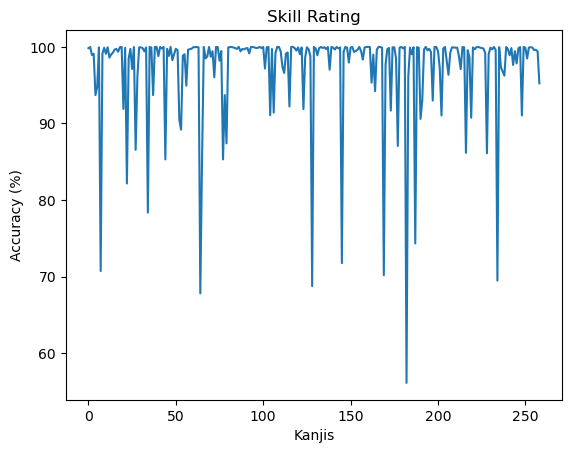

1/1 [==============================] - 0s 44ms/step
Predicted class: 8
Predicted class probability: 99.94906187057495 %
U+4E2D
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

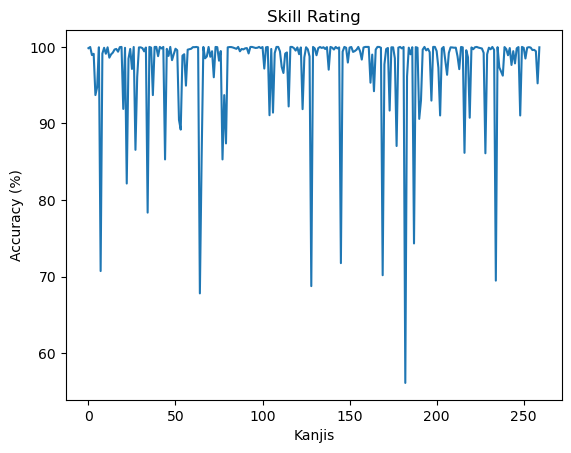

1/1 [==============================] - 0s 34ms/step
Predicted class: 13
Predicted class probability: 81.9756805896759 %
U+4E8B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

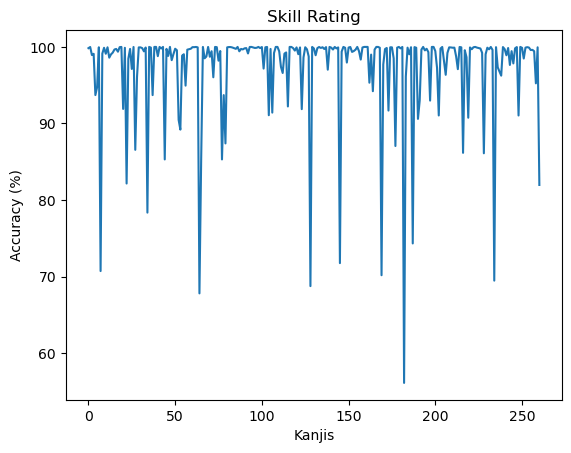

1/1 [==============================] - 0s 53ms/step
Predicted class: 7
Predicted class probability: 99.98006224632263 %
U+4E16
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

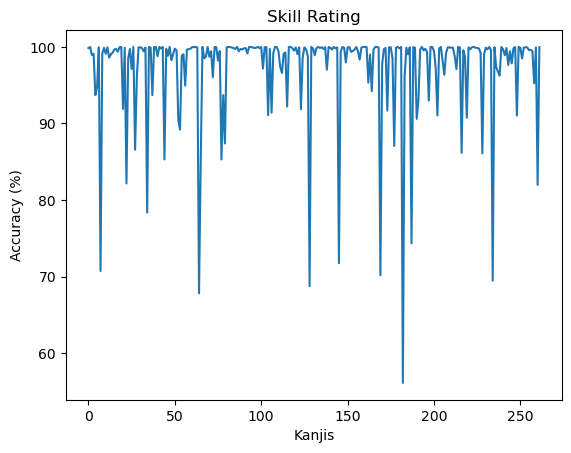

1/1 [==============================] - 0s 32ms/step
Predicted class: 8
Predicted class probability: 99.05812740325928 %
U+4E2D
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

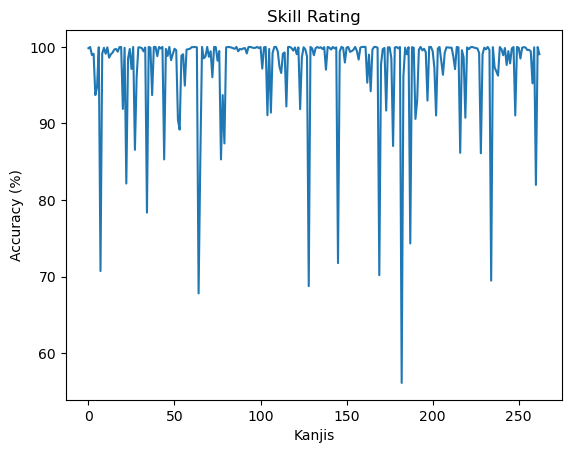

1/1 [==============================] - 0s 30ms/step
Predicted class: 13
Predicted class probability: 98.34870100021362 %
U+4E8B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

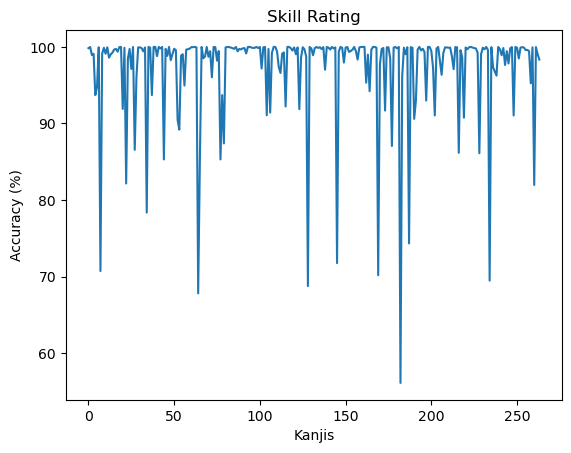

1/1 [==============================] - 0s 41ms/step
Predicted class: 4
Predicted class probability: 99.18349981307983 %
U+4E0A
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

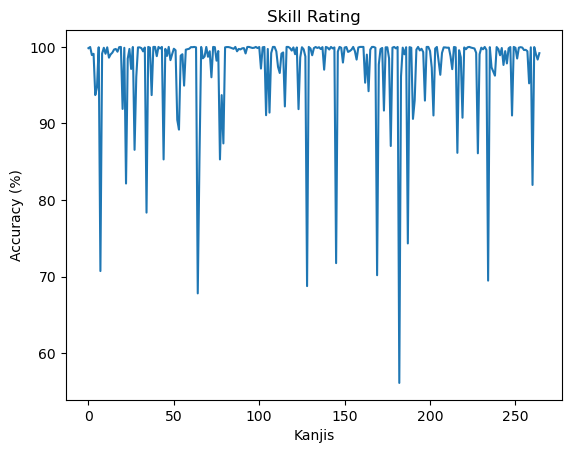

1/1 [==============================] - 0s 37ms/step
Predicted class: 13
Predicted class probability: 97.12457656860352 %
U+4E8B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

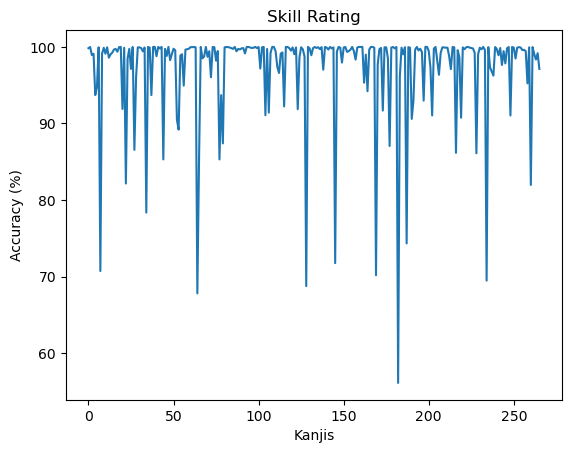

1/1 [==============================] - 0s 29ms/step
Predicted class: 0
Predicted class probability: 99.68656897544861 %
U+4E00
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

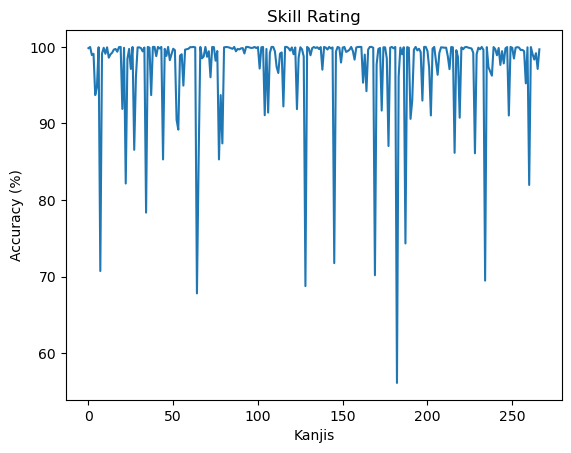

1/1 [==============================] - 0s 51ms/step
Predicted class: 15
Predicted class probability: 99.92873072624207 %
U+4E91
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

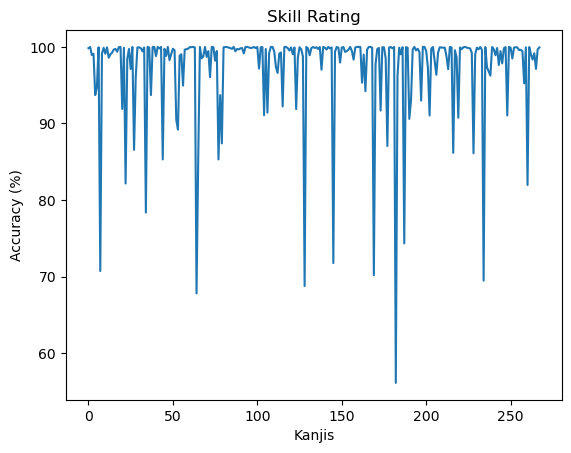

1/1 [==============================] - 0s 60ms/step
Predicted class: 4
Predicted class probability: 99.9860167503357 %
U+4E0A
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F',

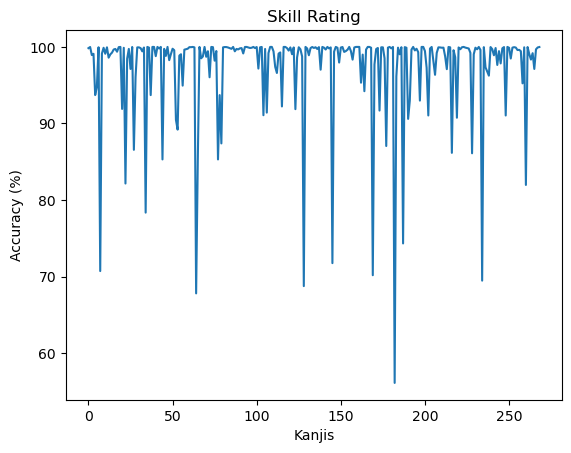

1/1 [==============================] - 0s 40ms/step
Predicted class: 0
Predicted class probability: 98.9410400390625 %
U+4E00
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F',

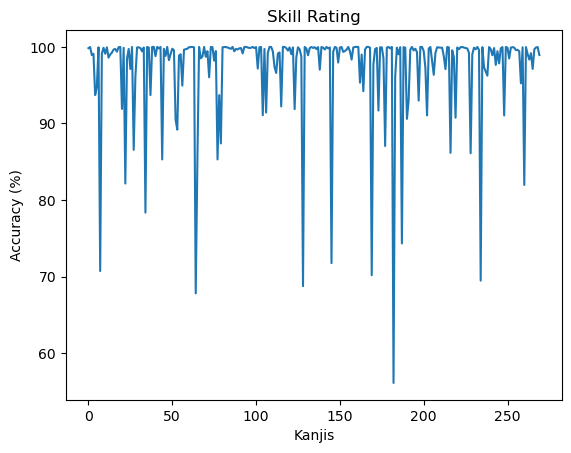

1/1 [==============================] - 0s 49ms/step
Predicted class: 18
Predicted class probability: 98.65358471870422 %
U+4EBA
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

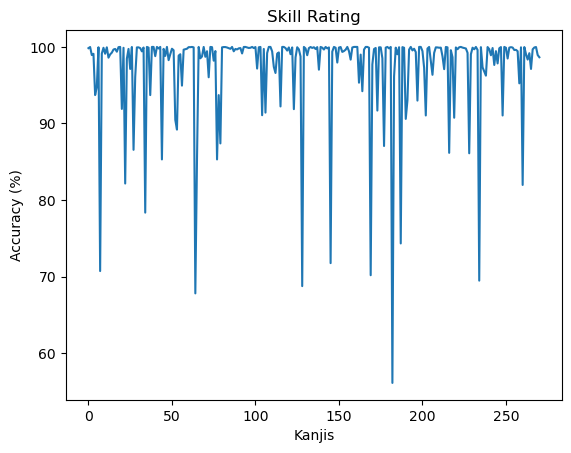

1/1 [==============================] - 0s 29ms/step
Predicted class: 7
Predicted class probability: 95.73296904563904 %
U+4E16
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

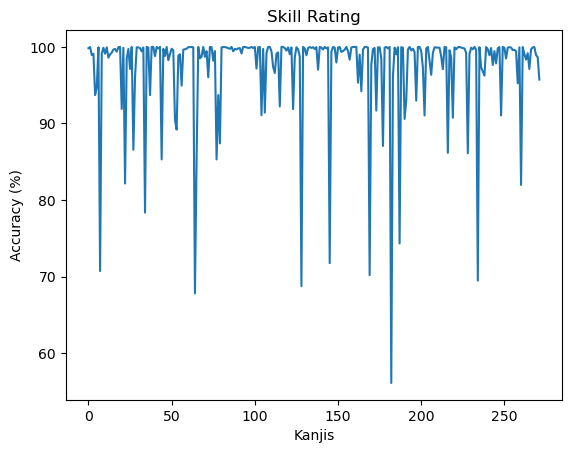

1/1 [==============================] - 0s 55ms/step
Predicted class: 18
Predicted class probability: 99.99996423721313 %
U+4EBA
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

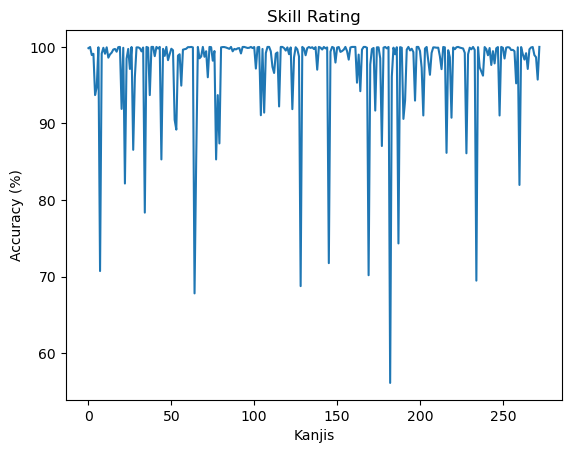

1/1 [==============================] - 0s 36ms/step
Predicted class: 4
Predicted class probability: 99.99375343322754 %
U+4E0A
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

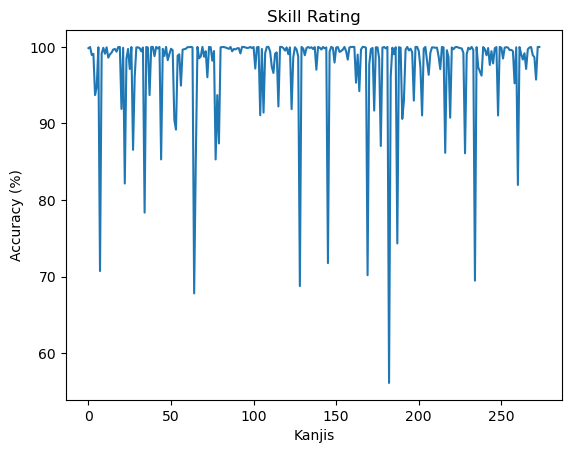

1/1 [==============================] - 0s 40ms/step
Predicted class: 4
Predicted class probability: 96.66190147399902 %
U+4E0A
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

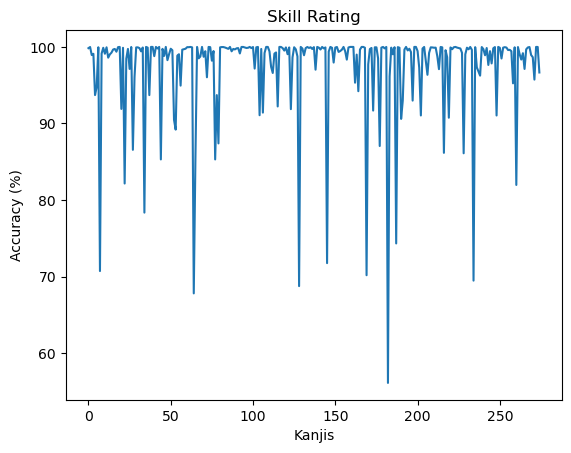

1/1 [==============================] - 0s 51ms/step
Predicted class: 15
Predicted class probability: 99.92873072624207 %
U+4E91
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

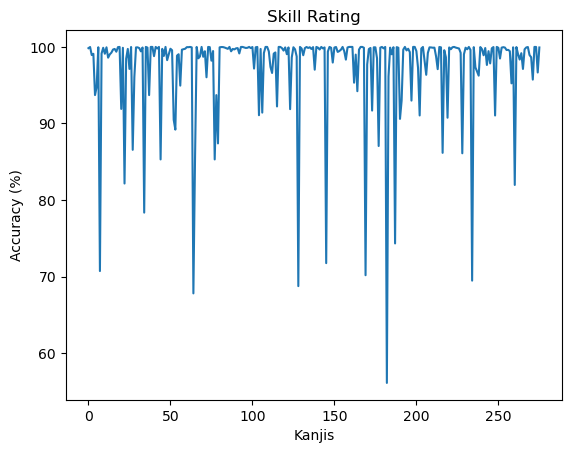

1/1 [==============================] - 0s 60ms/step
Predicted class: 13
Predicted class probability: 99.04043674468994 %
U+4E8B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

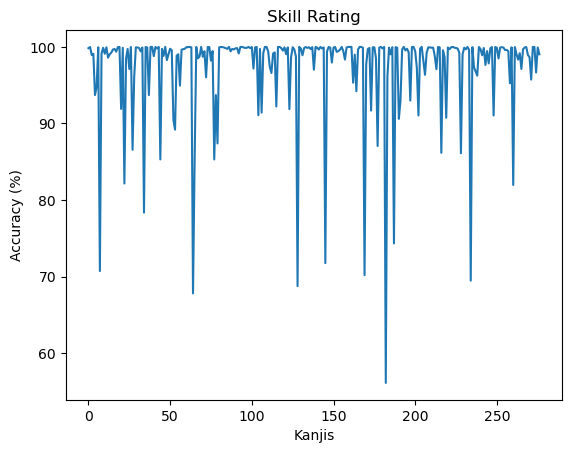

1/1 [==============================] - 0s 41ms/step
Predicted class: 13
Predicted class probability: 99.84914064407349 %
U+4E8B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

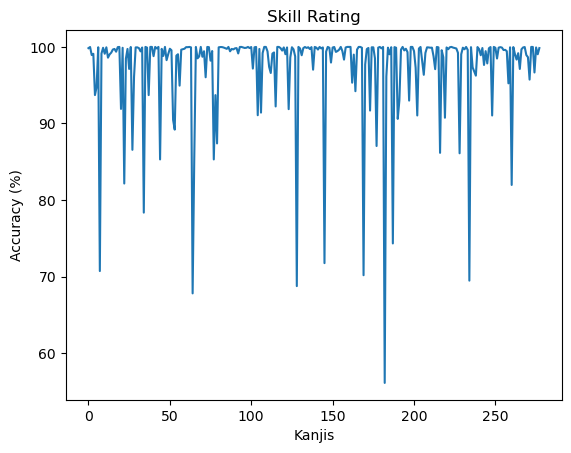

1/1 [==============================] - 0s 40ms/step
Predicted class: 4
Predicted class probability: 99.98669624328613 %
U+4E0A
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

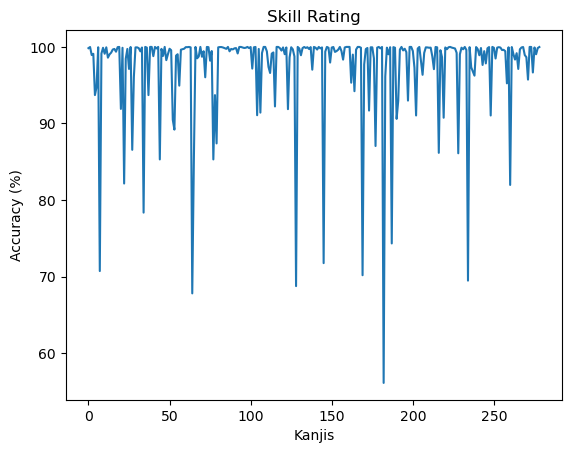

1/1 [==============================] - 0s 37ms/step
Predicted class: 14
Predicted class probability: 99.45677518844604 %
U+4E8C
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

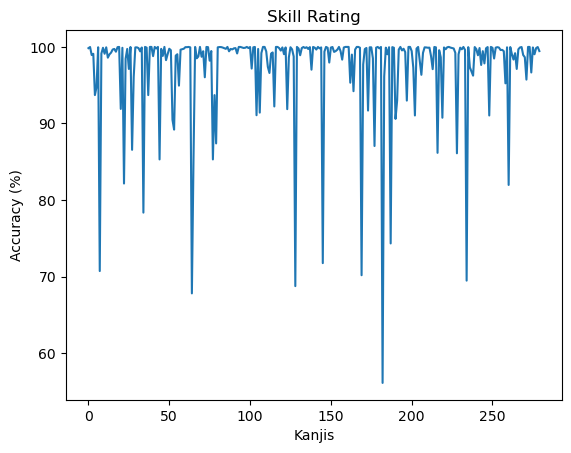

1/1 [==============================] - 0s 67ms/step
Predicted class: 14
Predicted class probability: 97.57556915283203 %
U+4E8C
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

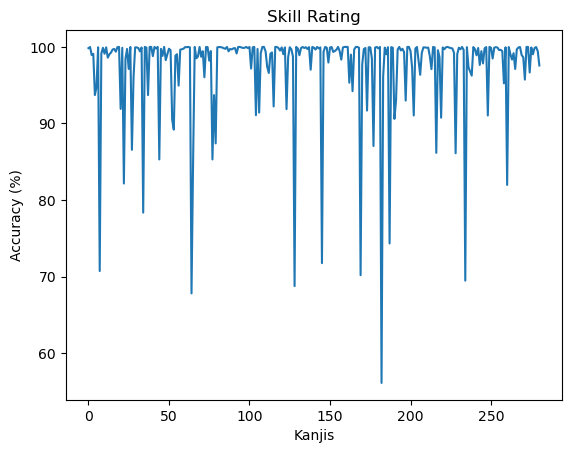

1/1 [==============================] - 0s 61ms/step
Predicted class: 7
Predicted class probability: 99.9826729297638 %
U+4E16
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F',

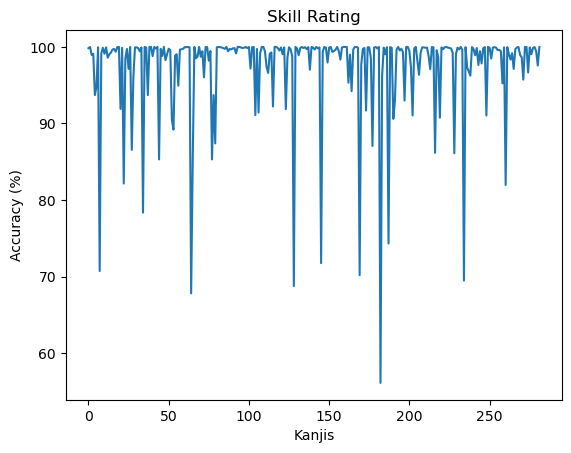

1/1 [==============================] - 0s 43ms/step
Predicted class: 3
Predicted class probability: 98.910391330719 %
U+4E09
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F', 

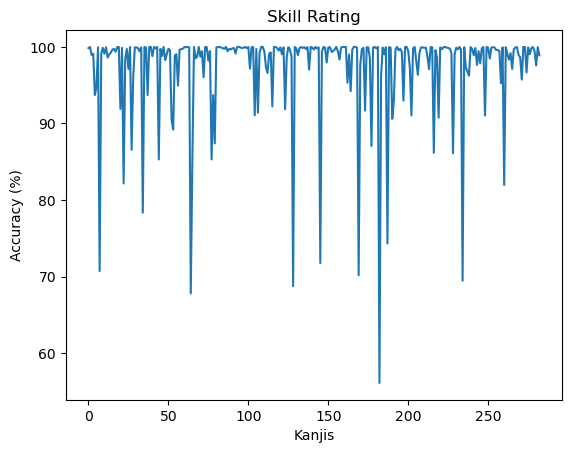

1/1 [==============================] - 0s 50ms/step
Predicted class: 5
Predicted class probability: 99.16319251060486 %
U+4E0B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

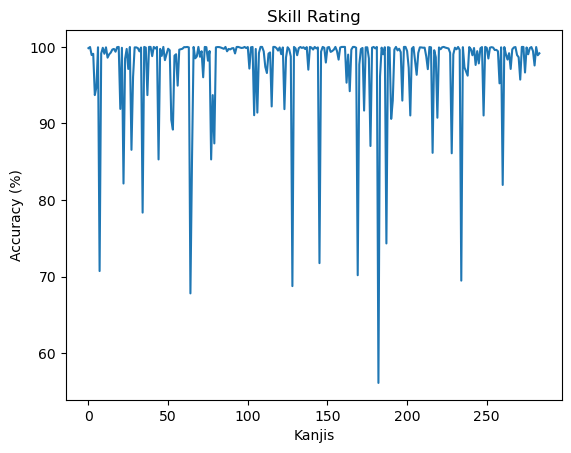

1/1 [==============================] - 0s 50ms/step
Predicted class: 18
Predicted class probability: 99.6905267238617 %
U+4EBA
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

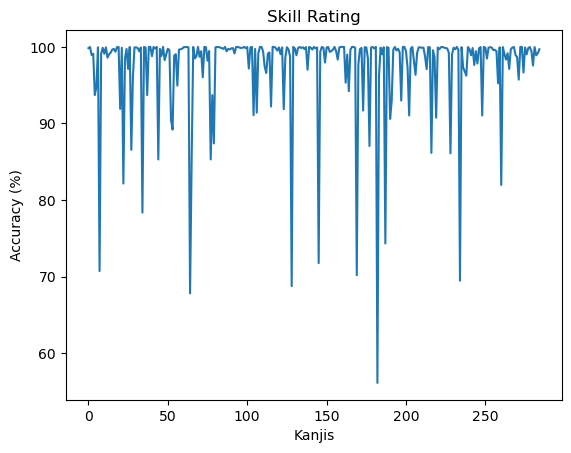

1/1 [==============================] - 0s 54ms/step
Predicted class: 14
Predicted class probability: 97.46861457824707 %
U+4E8C
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

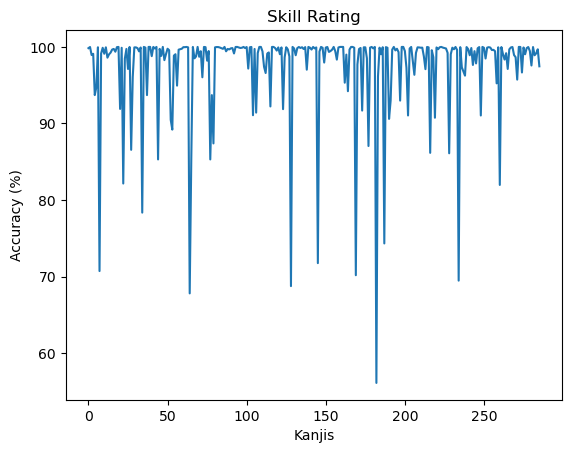

1/1 [==============================] - 0s 45ms/step
Predicted class: 18
Predicted class probability: 99.97095465660095 %
U+4EBA
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

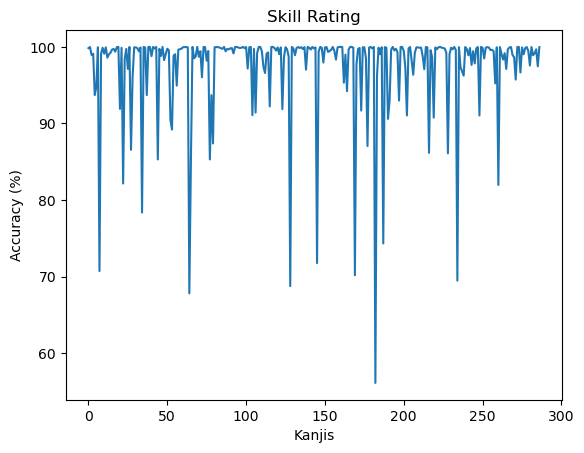

1/1 [==============================] - 0s 35ms/step
Predicted class: 1
Predicted class probability: 35.61058044433594 %
U+4E03
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

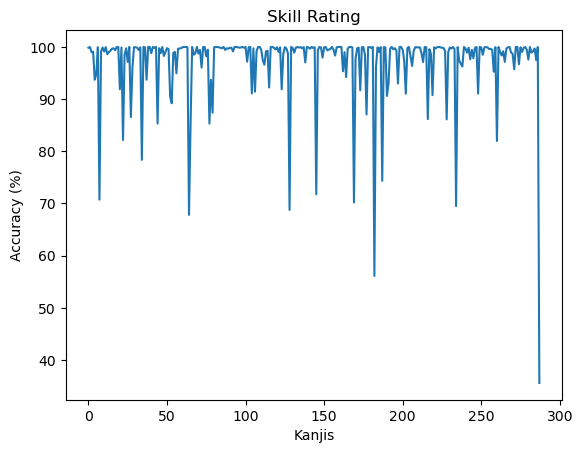

1/1 [==============================] - 0s 44ms/step
Predicted class: 13
Predicted class probability: 99.98869895935059 %
U+4E8B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

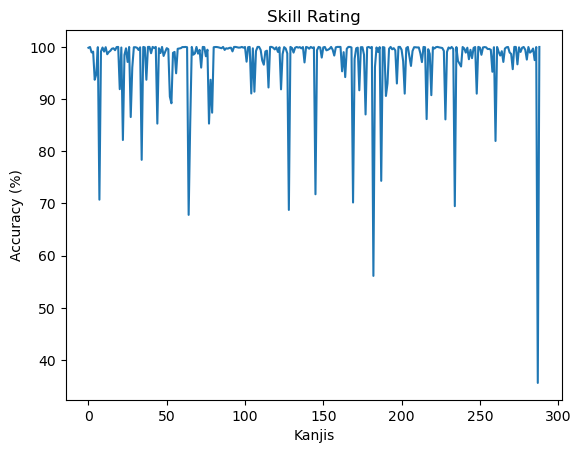

1/1 [==============================] - 0s 41ms/step
Predicted class: 13
Predicted class probability: 98.83514046669006 %
U+4E8B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

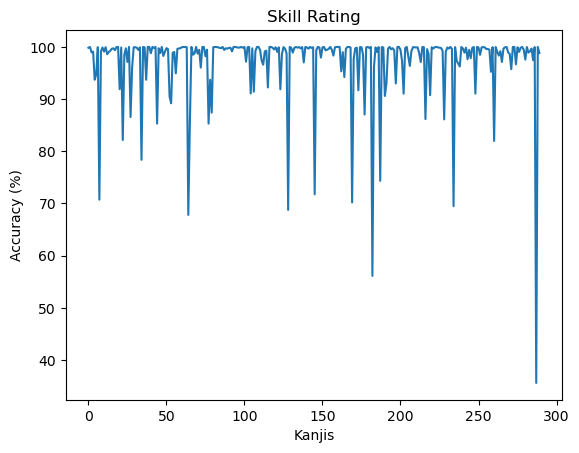

1/1 [==============================] - 0s 36ms/step
Predicted class: 3
Predicted class probability: 99.96836185455322 %
U+4E09
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

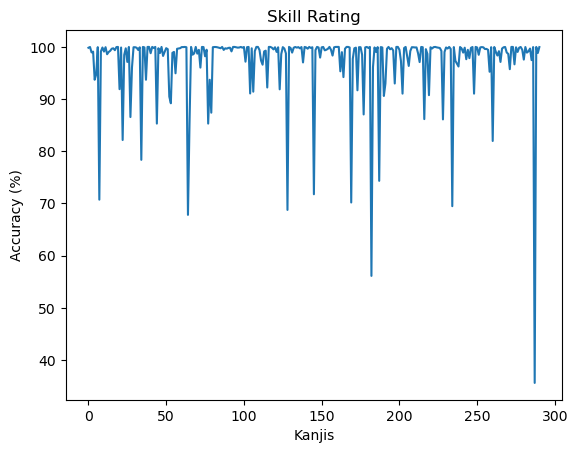

1/1 [==============================] - 0s 36ms/step
Predicted class: 4
Predicted class probability: 99.89812970161438 %
U+4E0A
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

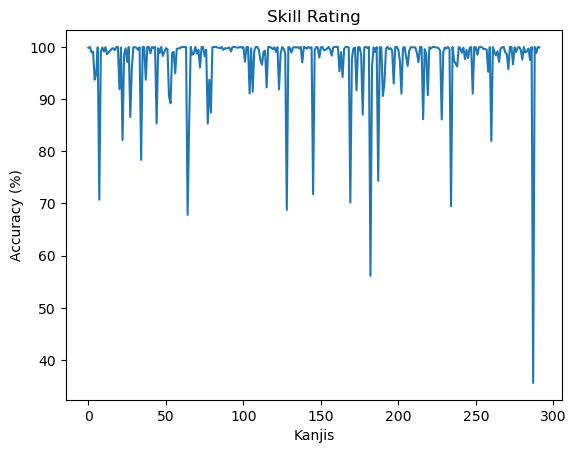

1/1 [==============================] - 0s 60ms/step
Predicted class: 14
Predicted class probability: 99.84460473060608 %
U+4E8C
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

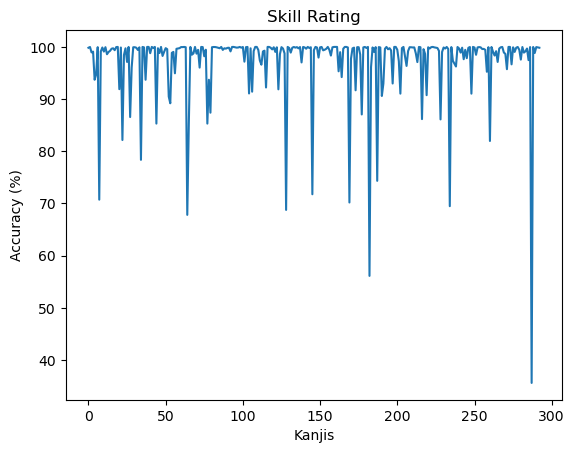

1/1 [==============================] - 0s 49ms/step
Predicted class: 15
Predicted class probability: 99.62438344955444 %
U+4E91
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

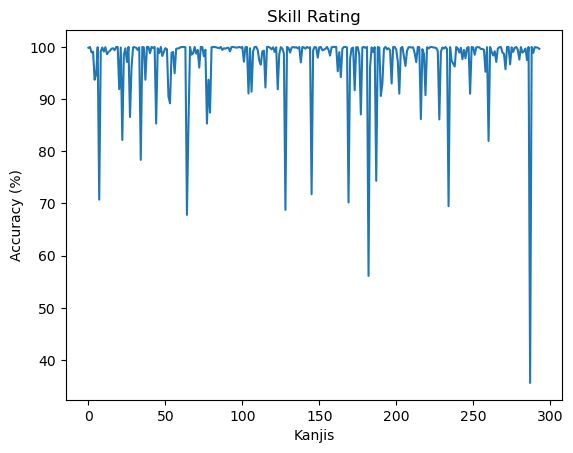

1/1 [==============================] - 0s 66ms/step
Predicted class: 3
Predicted class probability: 98.56643676757812 %
U+4E09
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

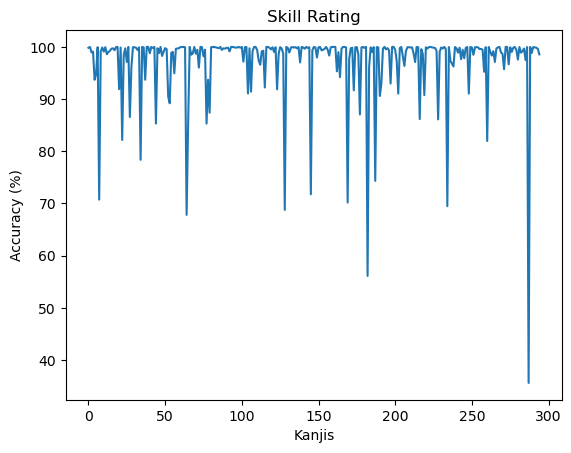

1/1 [==============================] - 0s 71ms/step
Predicted class: 18
Predicted class probability: 99.99938011169434 %
U+4EBA
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

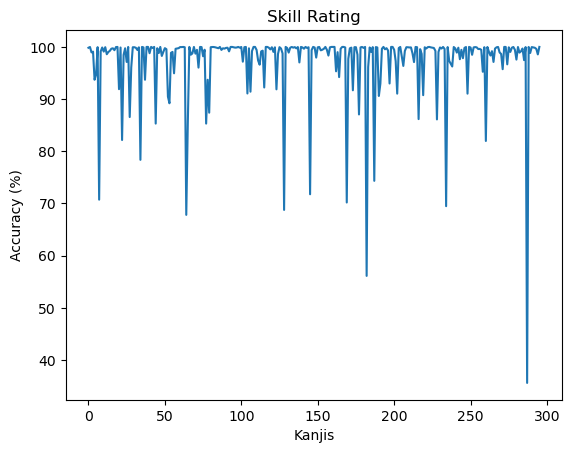

1/1 [==============================] - 0s 51ms/step
Predicted class: 15
Predicted class probability: 99.9998927116394 %
U+4E91
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F'

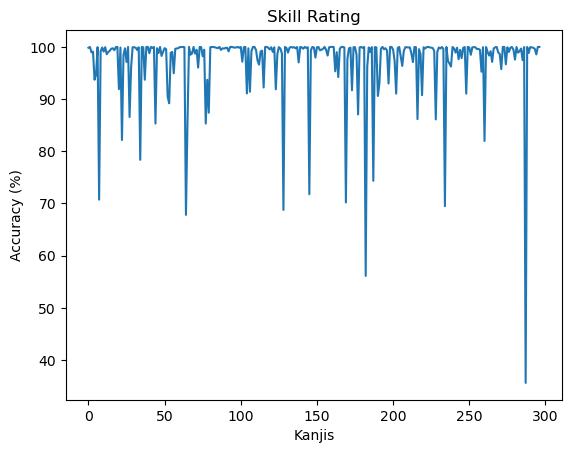

1/1 [==============================] - 0s 60ms/step
Predicted class: 12
Predicted class probability: 99.94568228721619 %
U+4E5F
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

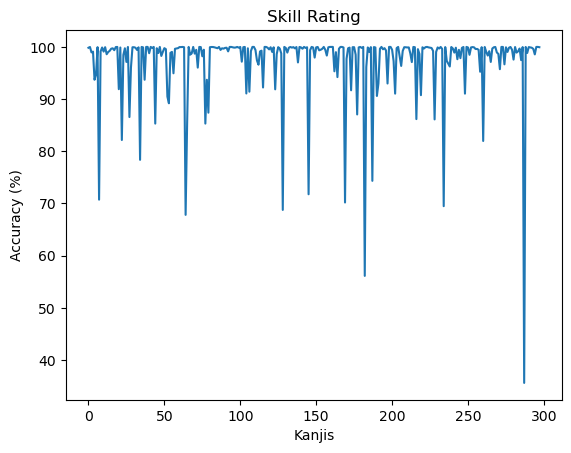

1/1 [==============================] - 0s 57ms/step
Predicted class: 15
Predicted class probability: 99.84936714172363 %
U+4E91
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

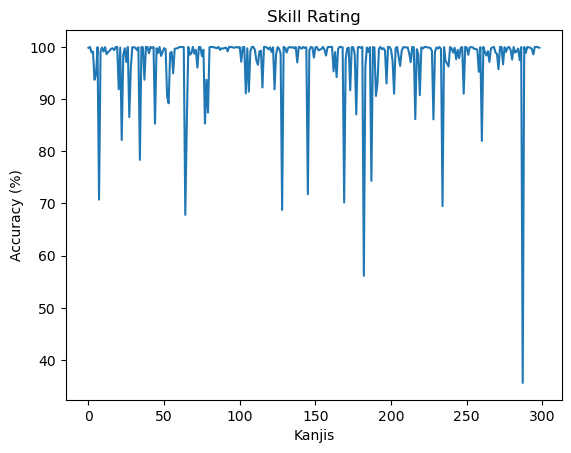

1/1 [==============================] - 0s 38ms/step
Predicted class: 13
Predicted class probability: 91.29534363746643 %
U+4E8B
('U+4E00', 99.83787536621094, 'U+4E09', 99.98769760131836, 'U+4E0D', 98.94430637359619, 'U+4E8B', 99.09936785697937, 'U+4E8C', 93.7128484249115, 'U+4E8C', 94.75677609443665, 'U+4E16', 99.95362758636475, 'U+4E5F', 70.7309365272522, 'U+4E0A', 99.13327097892761, 'U+4E4B', 99.8884379863739, 'U+4E00', 99.10733103752136, 'U+4E91', 99.94992017745972, 'U+4E8C', 98.59781265258789, 'U+4E00', 99.02631044387817, 'U+4E8C', 99.25442934036255, 'U+4E94', 99.6616542339325, 'U+4E00', 99.73481893539429, 'U+4E8B', 99.37542080879211, 'U+4E0B', 99.96997117996216, 'U+4EBA', 99.99998807907104, 'U+4E5F', 91.90340042114258, 'U+4E8C', 99.88644123077393, 'U+4E4B', 82.16266632080078, 'U+4E00', 98.4659194946289, 'U+4E00', 99.73605275154114, 'U+4E8B', 97.12457656860352, 'U+4E0A', 99.99064207077026, 'U+4E8C', 86.5627646446228, 'U+4E94', 96.06868624687195, 'U+4E00', 99.93718266487122, 'U+4E5F

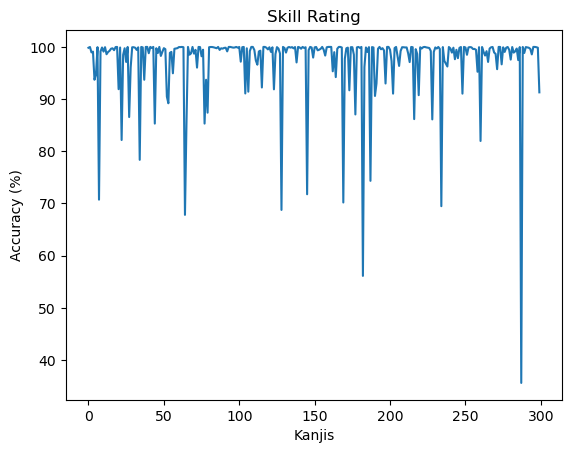

In [22]:
from matplotlib import pyplot
import random

accuracy_history = []
accuracy_history_img = []
predicted_class_index_list = [] 

for _ in range(100):
    image_number = random.randint(0, len(x_test) - 1)
    new_image = tf.expand_dims(x_test[image_number], 0)
    predictions = model.predict(new_image)
    predicted_class_index = predictions.argmax(axis=-1)[0]
    predicted_class_probability = predictions[0][predicted_class_index]
    print('Predicted class:', predicted_class_index)
    print('Predicted class probability:', predicted_class_probability * 100, "%")
    print(np.unique(Z)[predicted_class_index])

    accuracyHistory.save_and_display_accuracy(np.unique(Z)[predicted_class_index], predicted_class_probability * 100)
    accuracy_history_img.append(image_number)
    predicted_class_index_list.append(predicted_class_index)

    # pyplot.imshow(x_test[image_number], cmap='Greys')
    # pyplot.show()


Plot for:  一


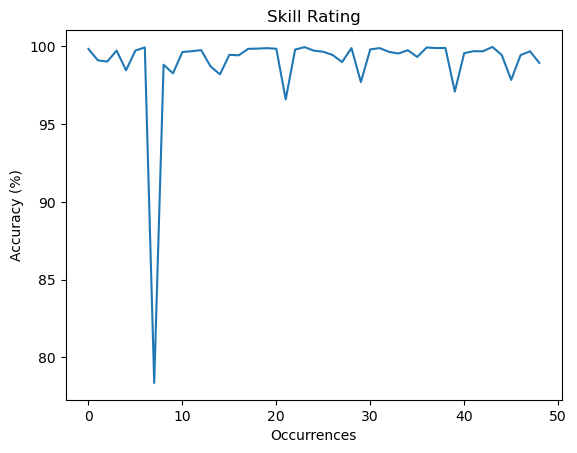

In [25]:
accuracyHistory.display_kanji_accuracy('U+4E00')

In [20]:

# print(accuracy_history)
# plt.plot(accuracy_history)
# plt.title('Skill Rating')
# plt.ylabel('Accuracy (%)')
# plt.xlabel('Attempts')
# plt.show()